## Importing Python Modules and Dataset

In [1]:
import os
from MakeDataset import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from MakeDataset import *
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import IPython
import warnings
import os
import tsfel
import IPython
import warnings
import numpy as np
import pandas as pd
cfg = tsfel.get_features_by_domain()
from sklearn.decomposition import PCA
pca_acceleration = PCA(n_components=2)
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore") 

warnings.filterwarnings("ignore")   

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


## check dataset size

In [2]:
print("Training data shape: ",X_train.shape)
print("Training label shape: ",y_train.shape)
print("Testing data shape: ",X_test.shape)
print("Testing label shape: ",y_test.shape)
print("Validation data shape: ",X_val.shape)
print("Validation label shape: ",y_val.shape)

Training data shape:  (108, 500, 3)
Training label shape:  (108,)
Testing data shape:  (36, 500, 3)
Testing label shape:  (36,)
Validation data shape:  (36, 500, 3)
Validation label shape:  (36,)


## Data Visualization

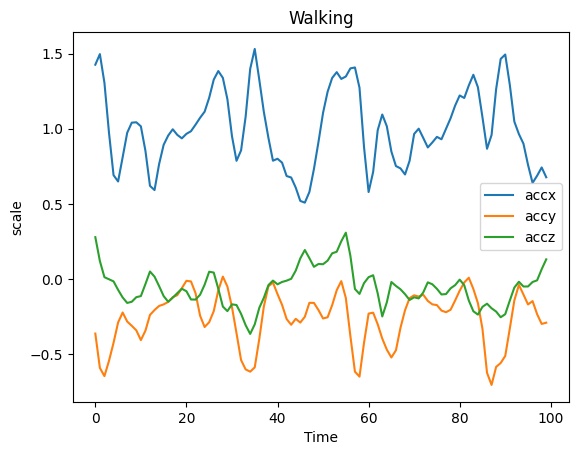

In [3]:
walk_df=pd.read_csv("/home/rishabh.mondal/ml_course_group/Mini-Project/Combined/Train/WALKING/Subject_1.csv")
column_data = walk_df['accx'].head(100)
column_data1 = walk_df['accy'].head(100)
column_data2 = walk_df['accz'].head(100)
column_data.plot()
column_data1.plot()
column_data2.plot()
plt.xlabel('Time')
plt.ylabel('scale')
plt.title('Walking')
plt.legend()

## Data Visualization of each activity class

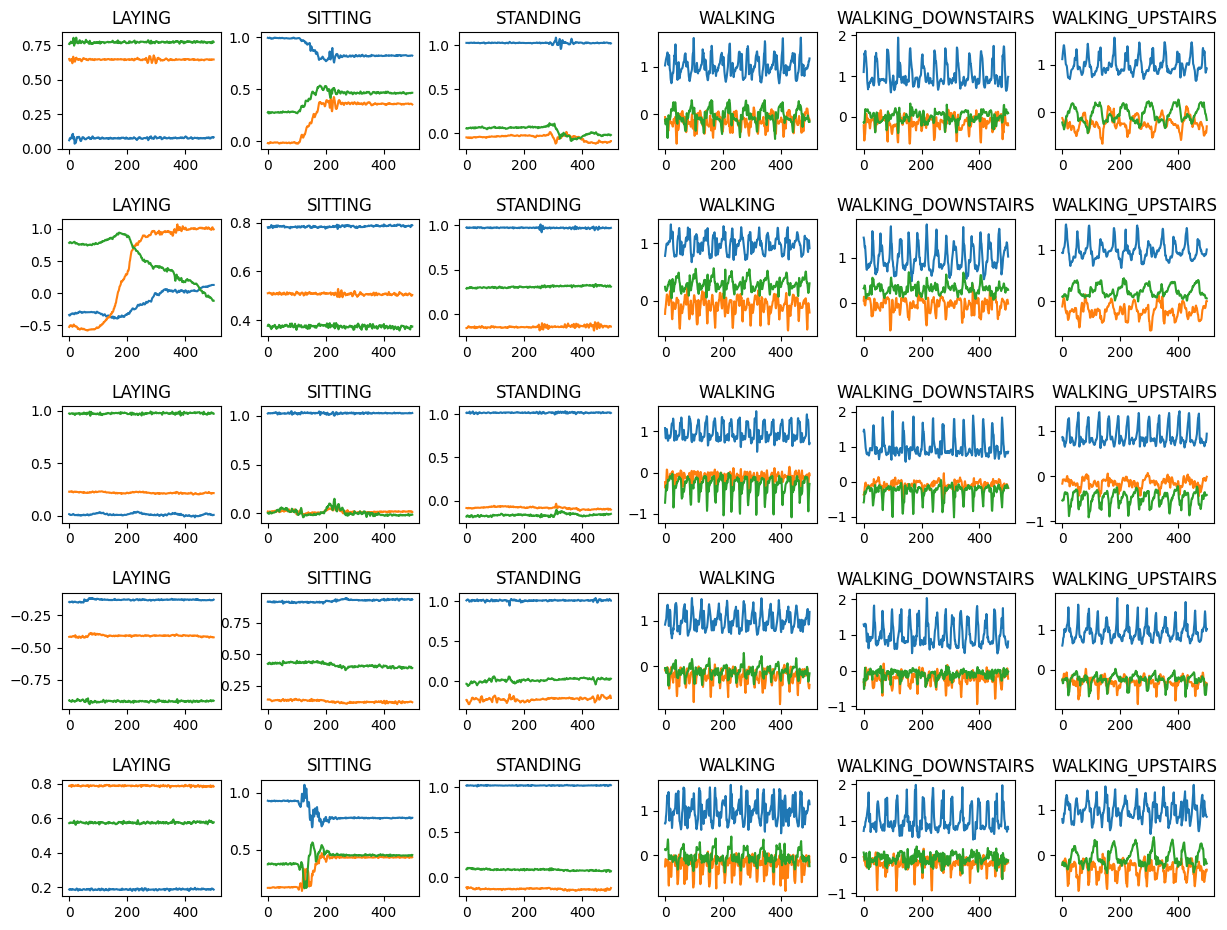

In [4]:
dataset_dir = os.path.join(combined_dir,"Train")

figure, axis = plt.subplots(5, len(classes))

folder_count = 0

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    
    X_train=[]
    y_train=[]
    count = 0


    for file in files:
        if count != 5:
            count += 1
        else:
            break
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]

        axis[count-1, folder_count].plot(df.values)
        axis[count-1, folder_count].set_title(folder)
    
    folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.6)
plt.show()

## Subplots of static activities with mean and standard deviation 

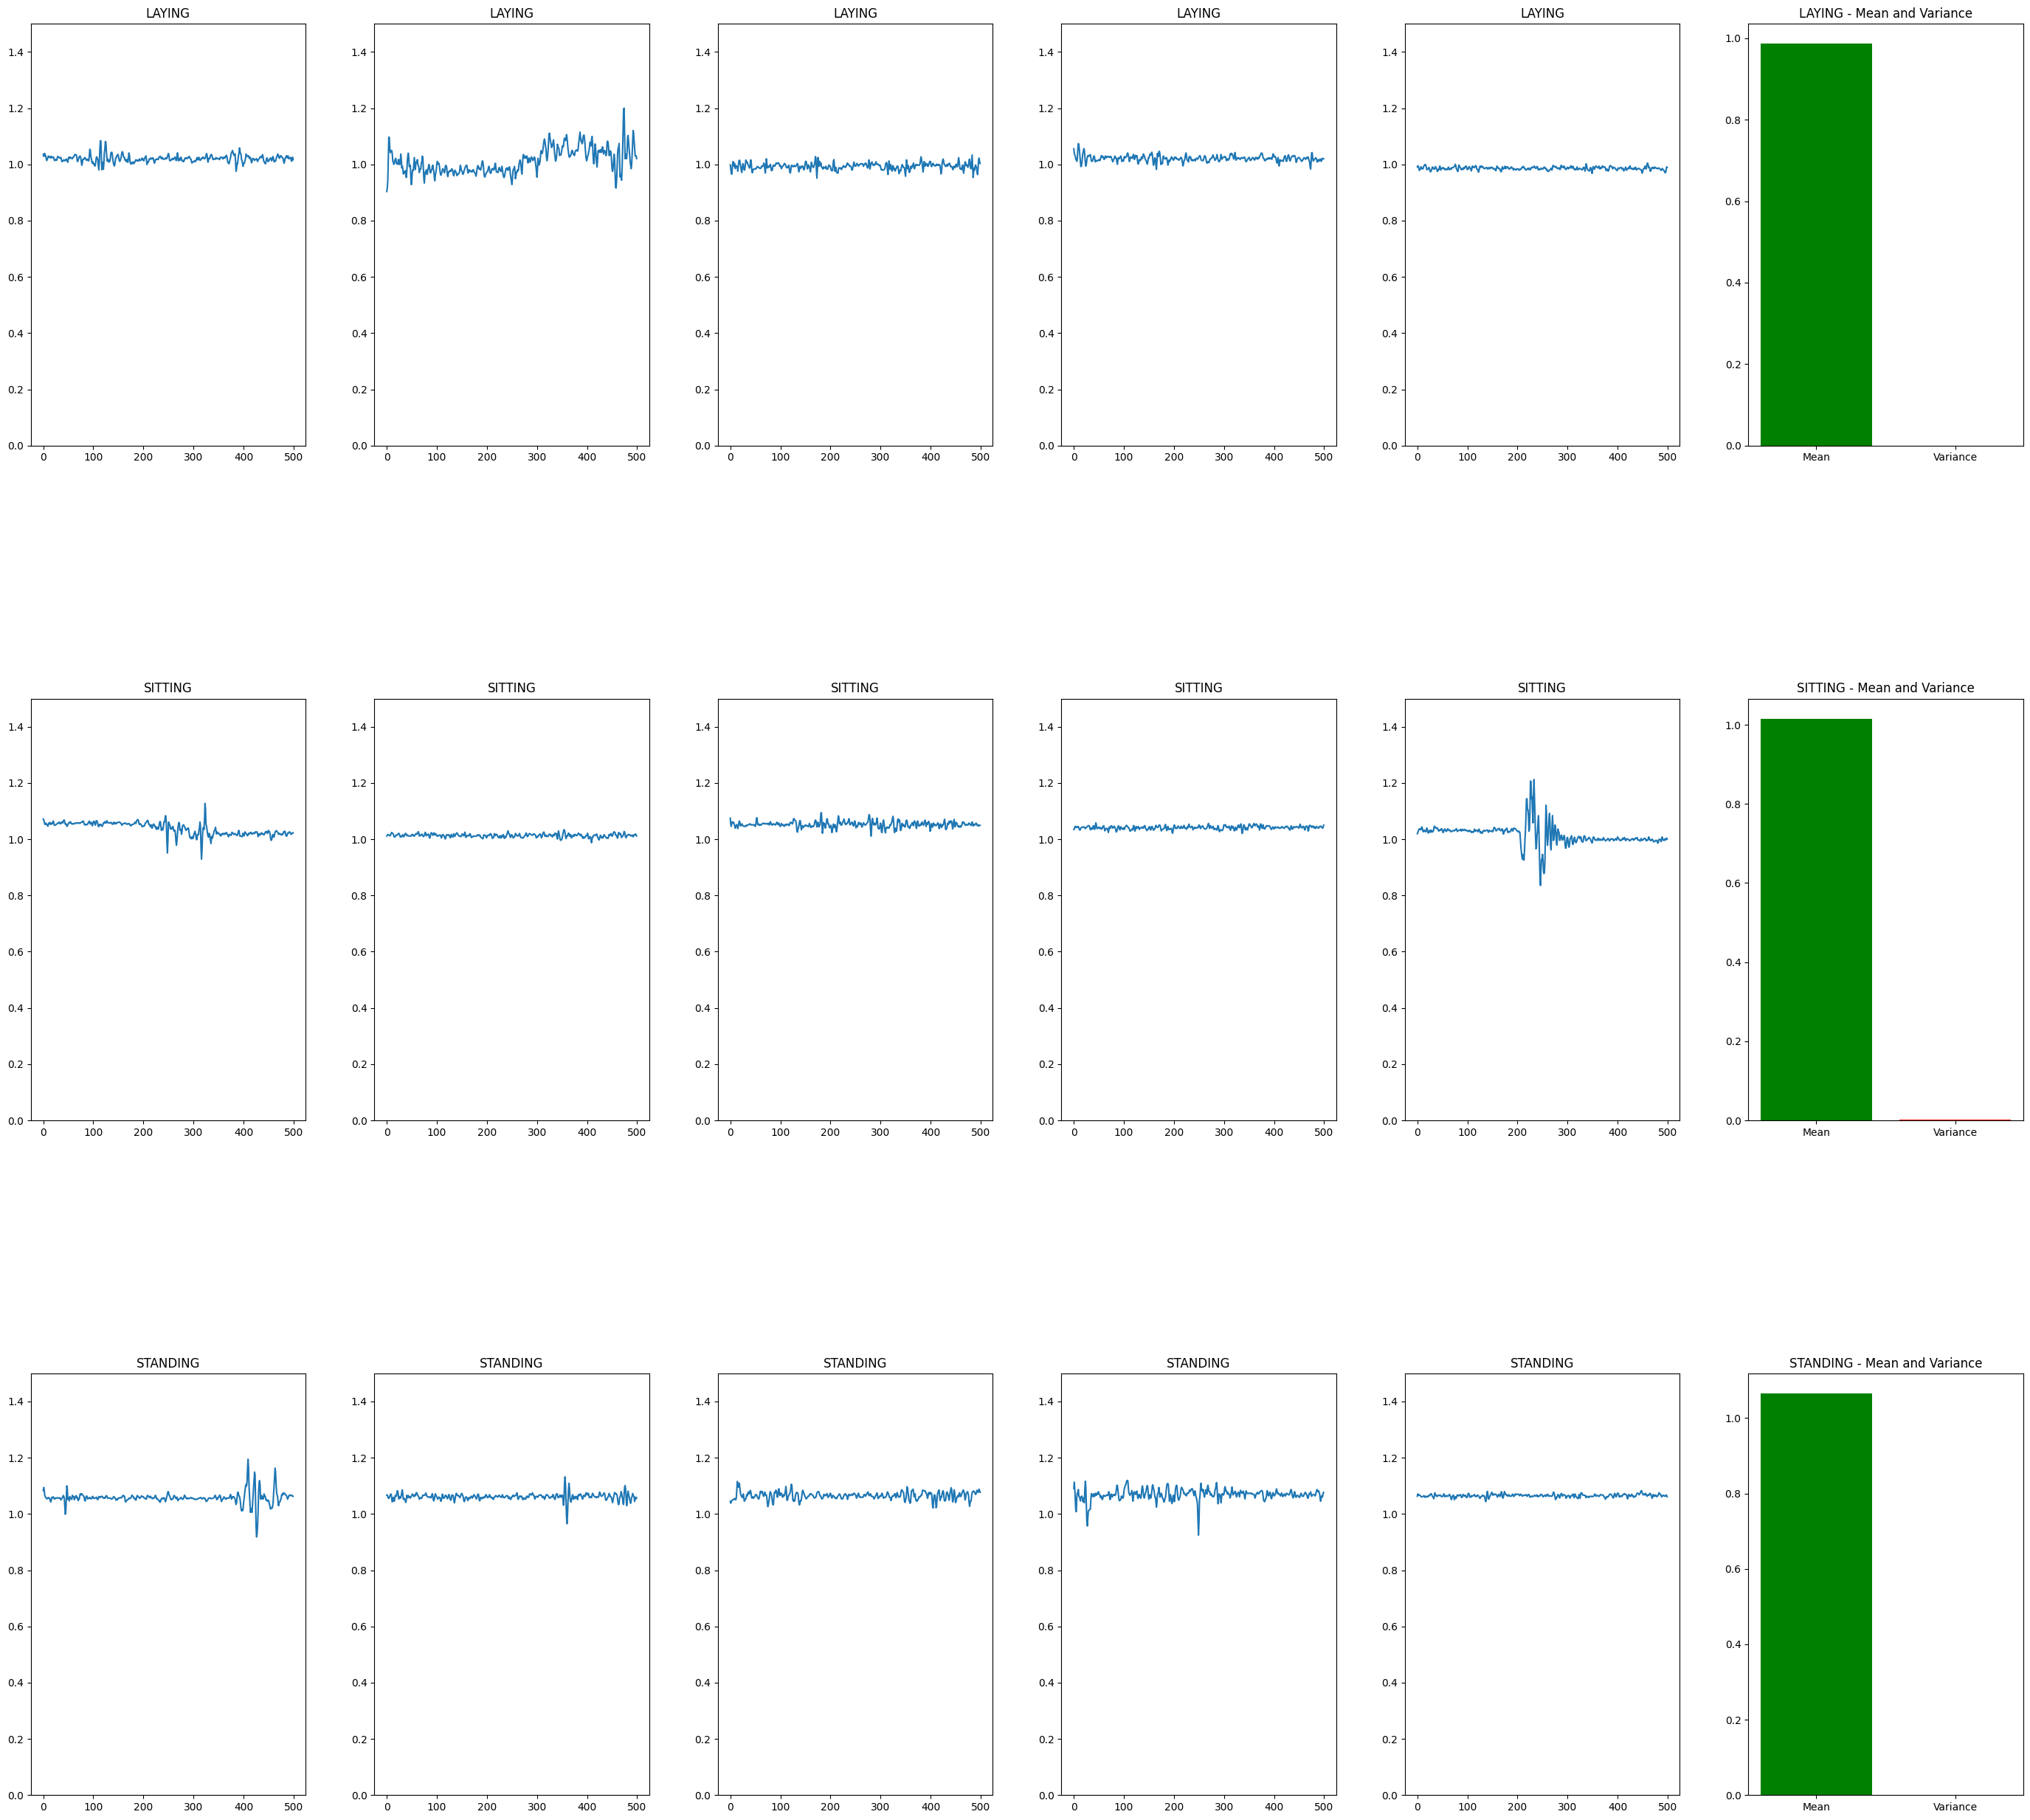

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

combined_dir = "/home/rishabh.mondal/ml_course_group/Mini-Project/Combined"
dataset_dir = os.path.join(combined_dir, "Train")
offset = 0  
time = 10  

figure, axis = plt.subplots(3, 6, figsize=(15, 12))

folder_count = 0

for folder in ["LAYING", "SITTING", "STANDING"]:
    files = os.listdir(os.path.join(dataset_dir, folder))

    X_train = []
    y_train = []
    count = 0

    for file in files:
        if count != 5:
            count += 1
        else:
            break
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]

        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        axis[folder_count, count-1].plot(df["linacc"].values)
        axis[folder_count, count-1].set_title(folder)
        axis[folder_count, count-1].set_ylim(0, 1.5)

    # Calculate mean and variance for the folder
    mean_linacc = df["linacc"].mean()
    variance_linacc = df["linacc"].var()

    # Plot mean and variance subplot
    axis[folder_count, 5].bar(["Mean", "Variance"], [mean_linacc, variance_linacc], color=['green', 'red'])
    axis[folder_count, 5].set_title(f"{folder} - Mean and Variance")

    folder_count += 1

plt.subplots_adjust(left=0, bottom=0, right=1.8, top=2, wspace=0.25, hspace=0.6)
plt.show()


## Subplots of dynamic activities with mean and standard deviation

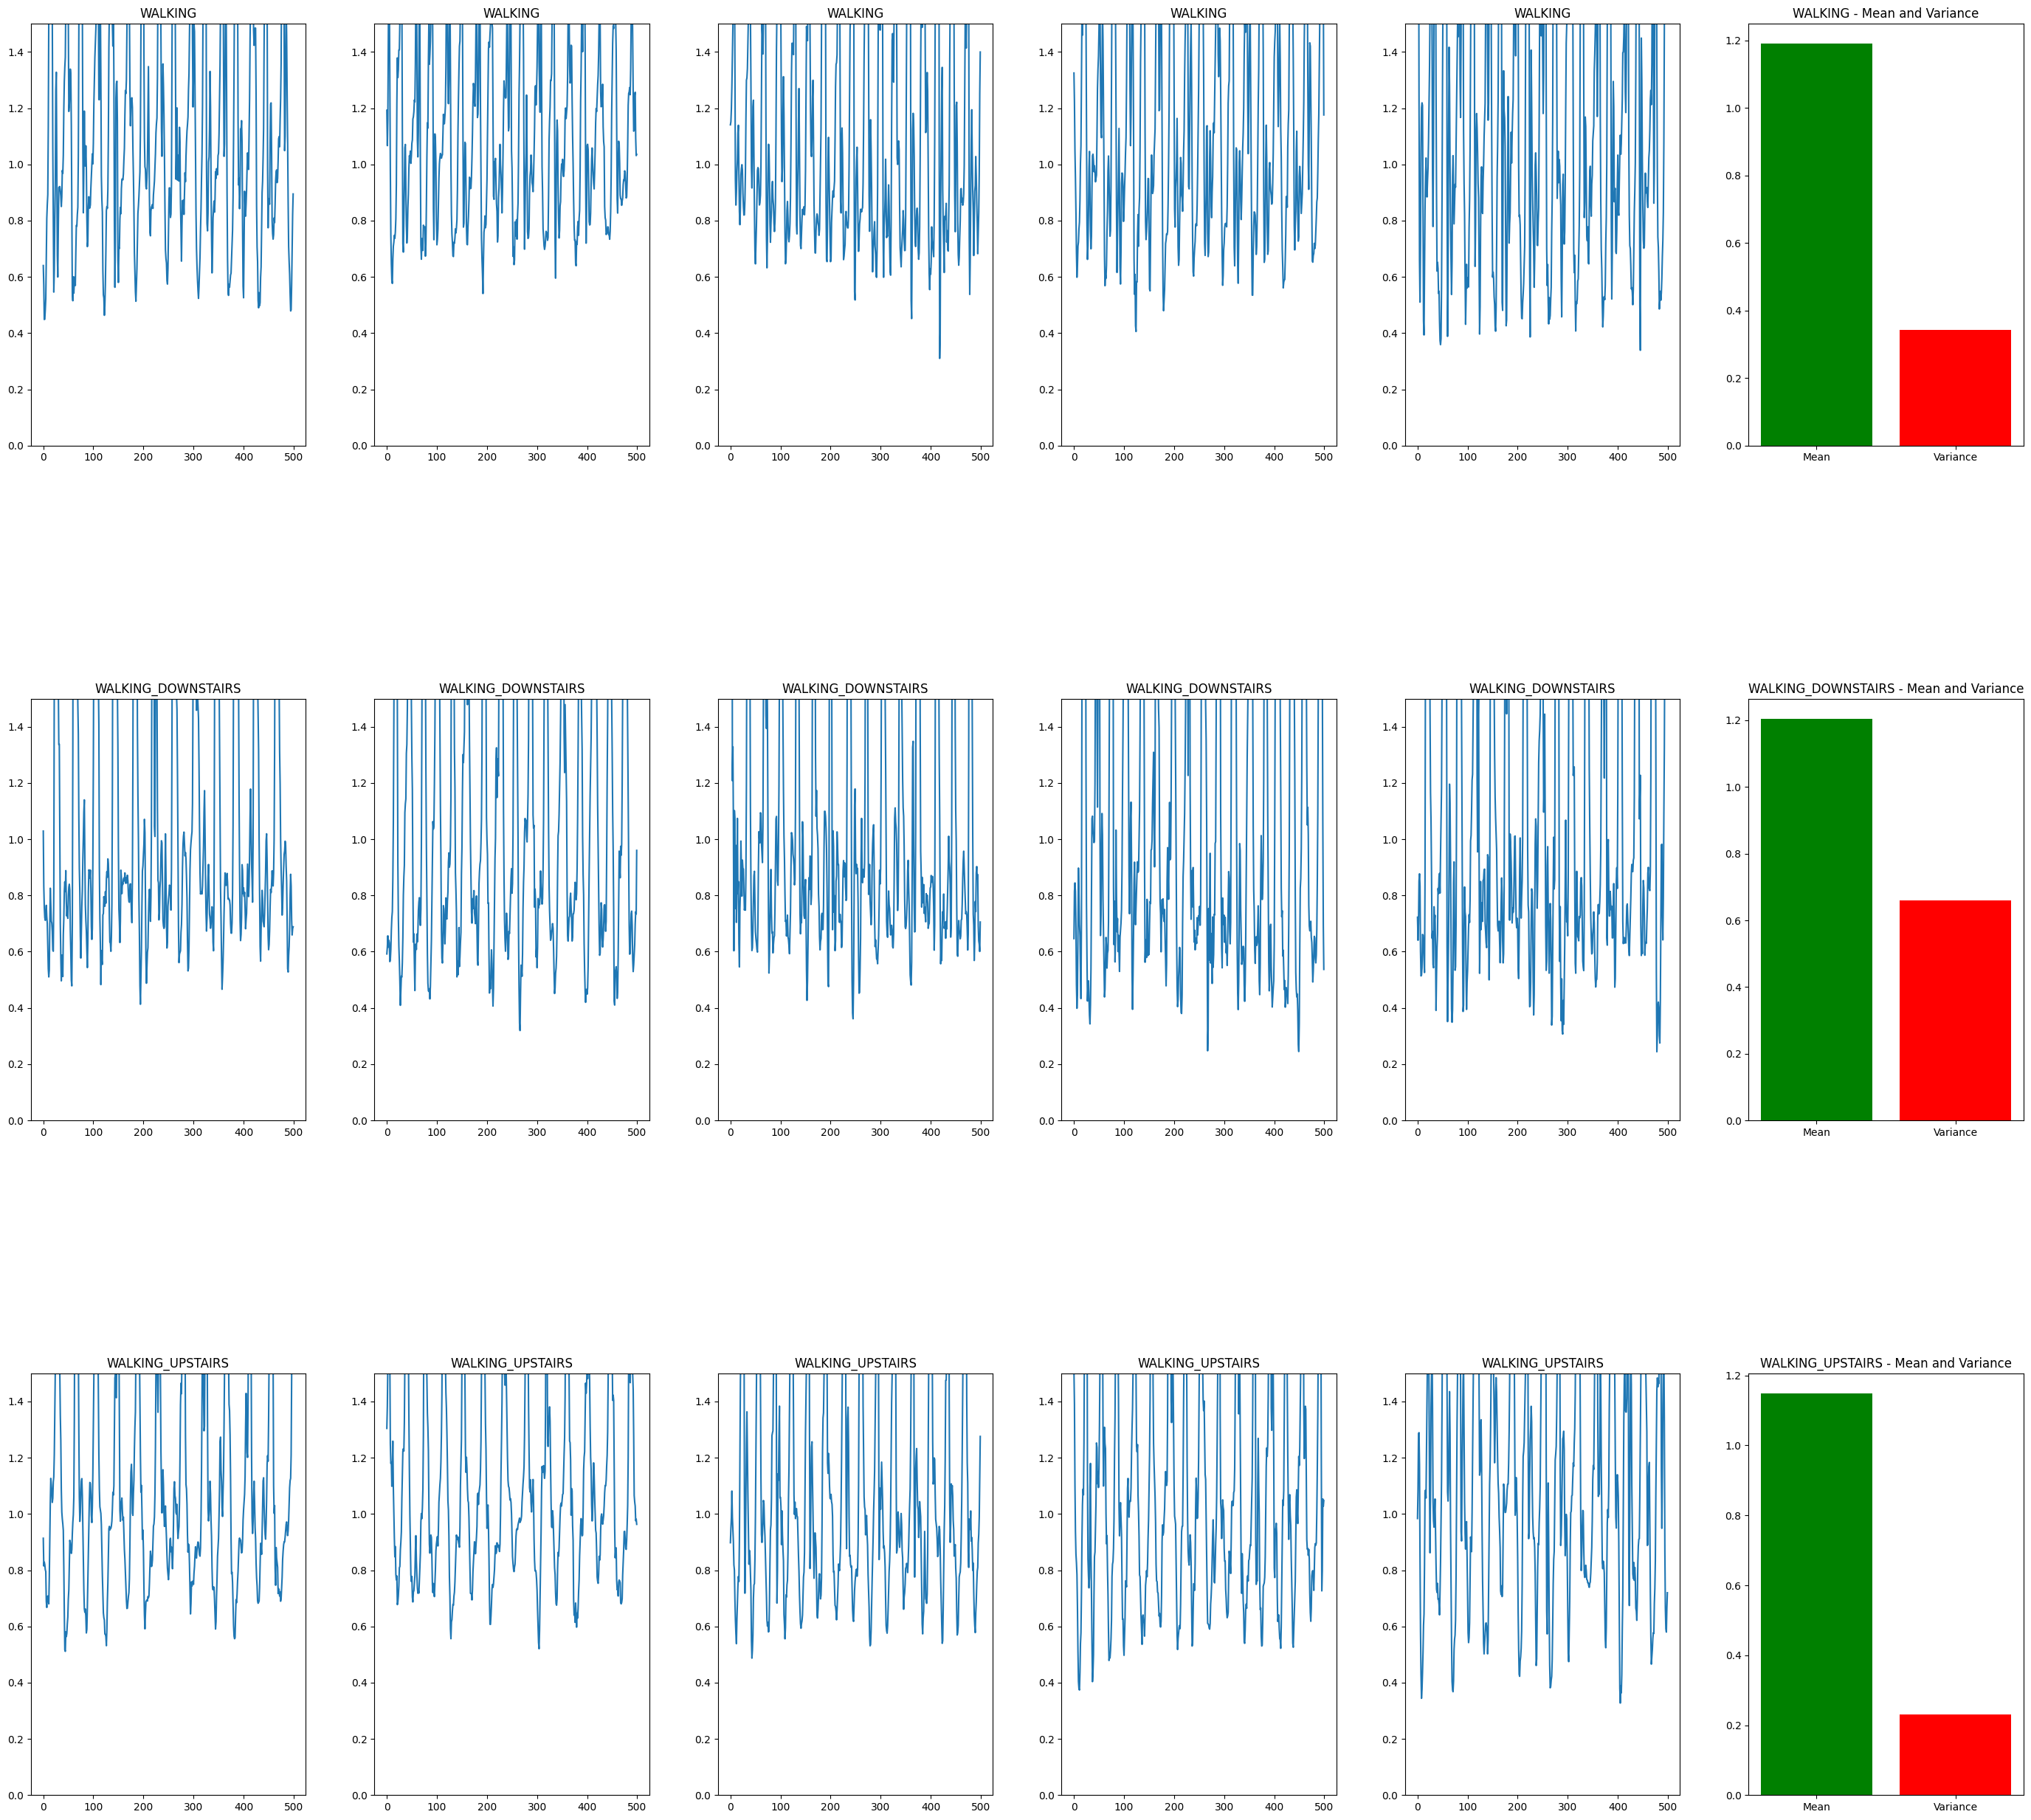

In [6]:
combined_dir = "/home/rishabh.mondal/ml_course_group/Mini-Project/Combined"
dataset_dir = os.path.join(combined_dir, "Train")
offset = 0  
time = 10  

figure, axis = plt.subplots(3, 6, figsize=(15, 12))

folder_count = 0

for folder in ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]:
    files = os.listdir(os.path.join(dataset_dir, folder))

    X_train = []
    y_train = []
    count = 0

    for file in files:
        if count != 5:
            count += 1
        else:
            break
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]

        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        axis[folder_count, count-1].plot(df["linacc"].values)
        axis[folder_count, count-1].set_title(folder)
        axis[folder_count, count-1].set_ylim(0, 1.5)

    # Calculate mean and variance for the folder
    mean_linacc = df["linacc"].mean()
    variance_linacc = df["linacc"].var()

    # Plot mean and variance subplot
    axis[folder_count, 5].bar(["Mean", "Variance"], [mean_linacc, variance_linacc], color=['green', 'red'])
    axis[folder_count, 5].set_title(f"{folder} - Mean and Variance")

    folder_count += 1

plt.subplots_adjust(left=0, bottom=0, right=1.8, top=2, wspace=0.25, hspace=0.6)
plt.show()


## Q1. Do you think the model will be able to classify the activities based on the data?

##### When analyzing both static and dynamic activities through static and dynamic plotting of the data, it becomes evident that the data points for dynamic activities are more spread out compared to static activities. This increased spread signifies higher variability in the dynamic activities. The complexity of dynamic activities introduces more diverse patterns and movements, leading to a wider range of sensor data. As a result, the model has a better ability to classify dynamic activities accurately. The increased variance in the dynamic activities allows the model to capture and learn from a broader spectrum of patterns, making it more adept at distinguishing between different dynamic activities. In contrast, static activities exhibit less variability, which may pose challenges for the model in accurately discerning subtle differences.

## Q2. Do you think we need a machine learning model to differentiate between static and dynamic activities based on the data?

##### By vusualisation of data we can see that there is a clear difference between static and dynamic activities. The static activities have a very small range of values for each sensor, whereas the dynamic activities have a much larger range of values. This is because the dynamic activities involve more movement and therefore the sensors are recording a wider range of values and genarate more varience in data. This means that we can differentiate between static and dynamic activities without the need for a machine learning model.

## Q3. Training Decision Tree using Training Set

In [7]:
from MakeDataset import *
from sklearn.tree import DecisionTreeClassifier

###  Data read

In [8]:
xtrain = X_train.reshape(108,1500)
ytrain = y_train
print("xTrain Size:", xtrain.shape, "and yTrain Size:", ytrain.shape)

xTrain Size: (108, 1500) and yTrain Size: (108,)


### Train a decision tree model with train data and predict on test data

Accuracy Score: 0.4722222222222222


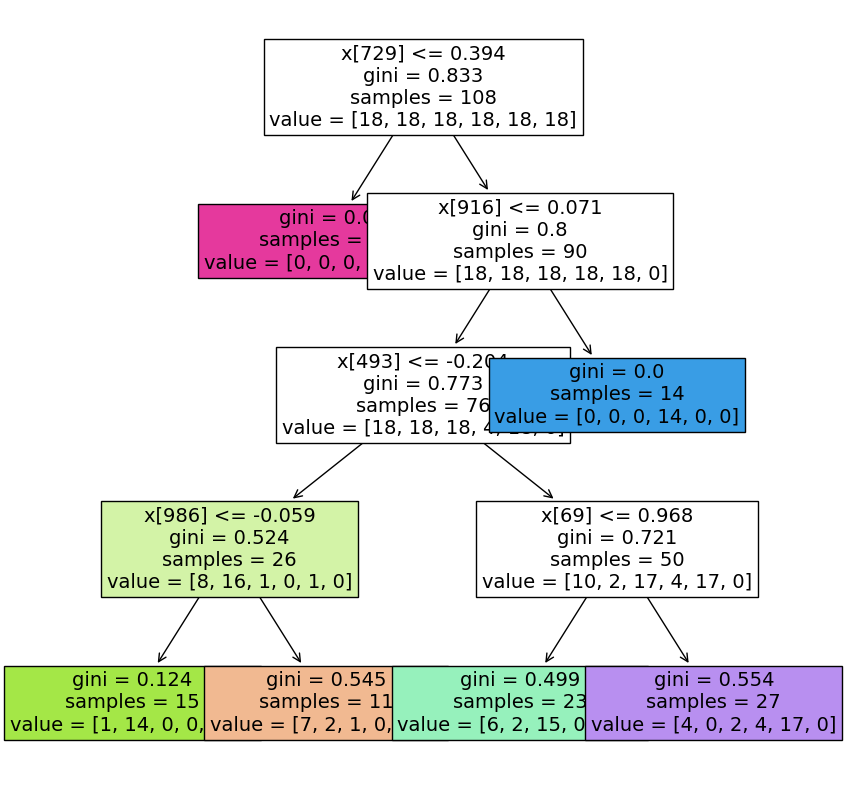

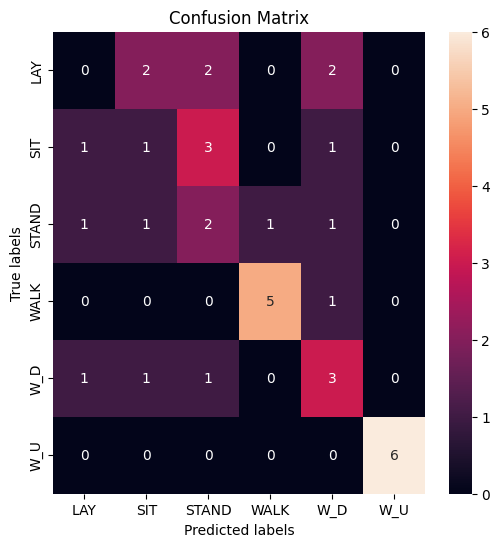

In [9]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(xtrain, ytrain)
yPred = dt.predict(X_test.reshape(36,1500))
print("Accuracy Score:", accuracy_score(y_test, yPred))

plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, fontsize=14)
plt.show()
cm = confusion_matrix(y_test, yPred, labels=[1,2,3,4,5,6])
label_names = ["LAY","SIT","STAND","WALK","W_D","W_U"]

plt.figure(figsize=(6,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10) 

ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()

## Q4.Training Decision Tree for varying depths (2 to 8) using Training Set

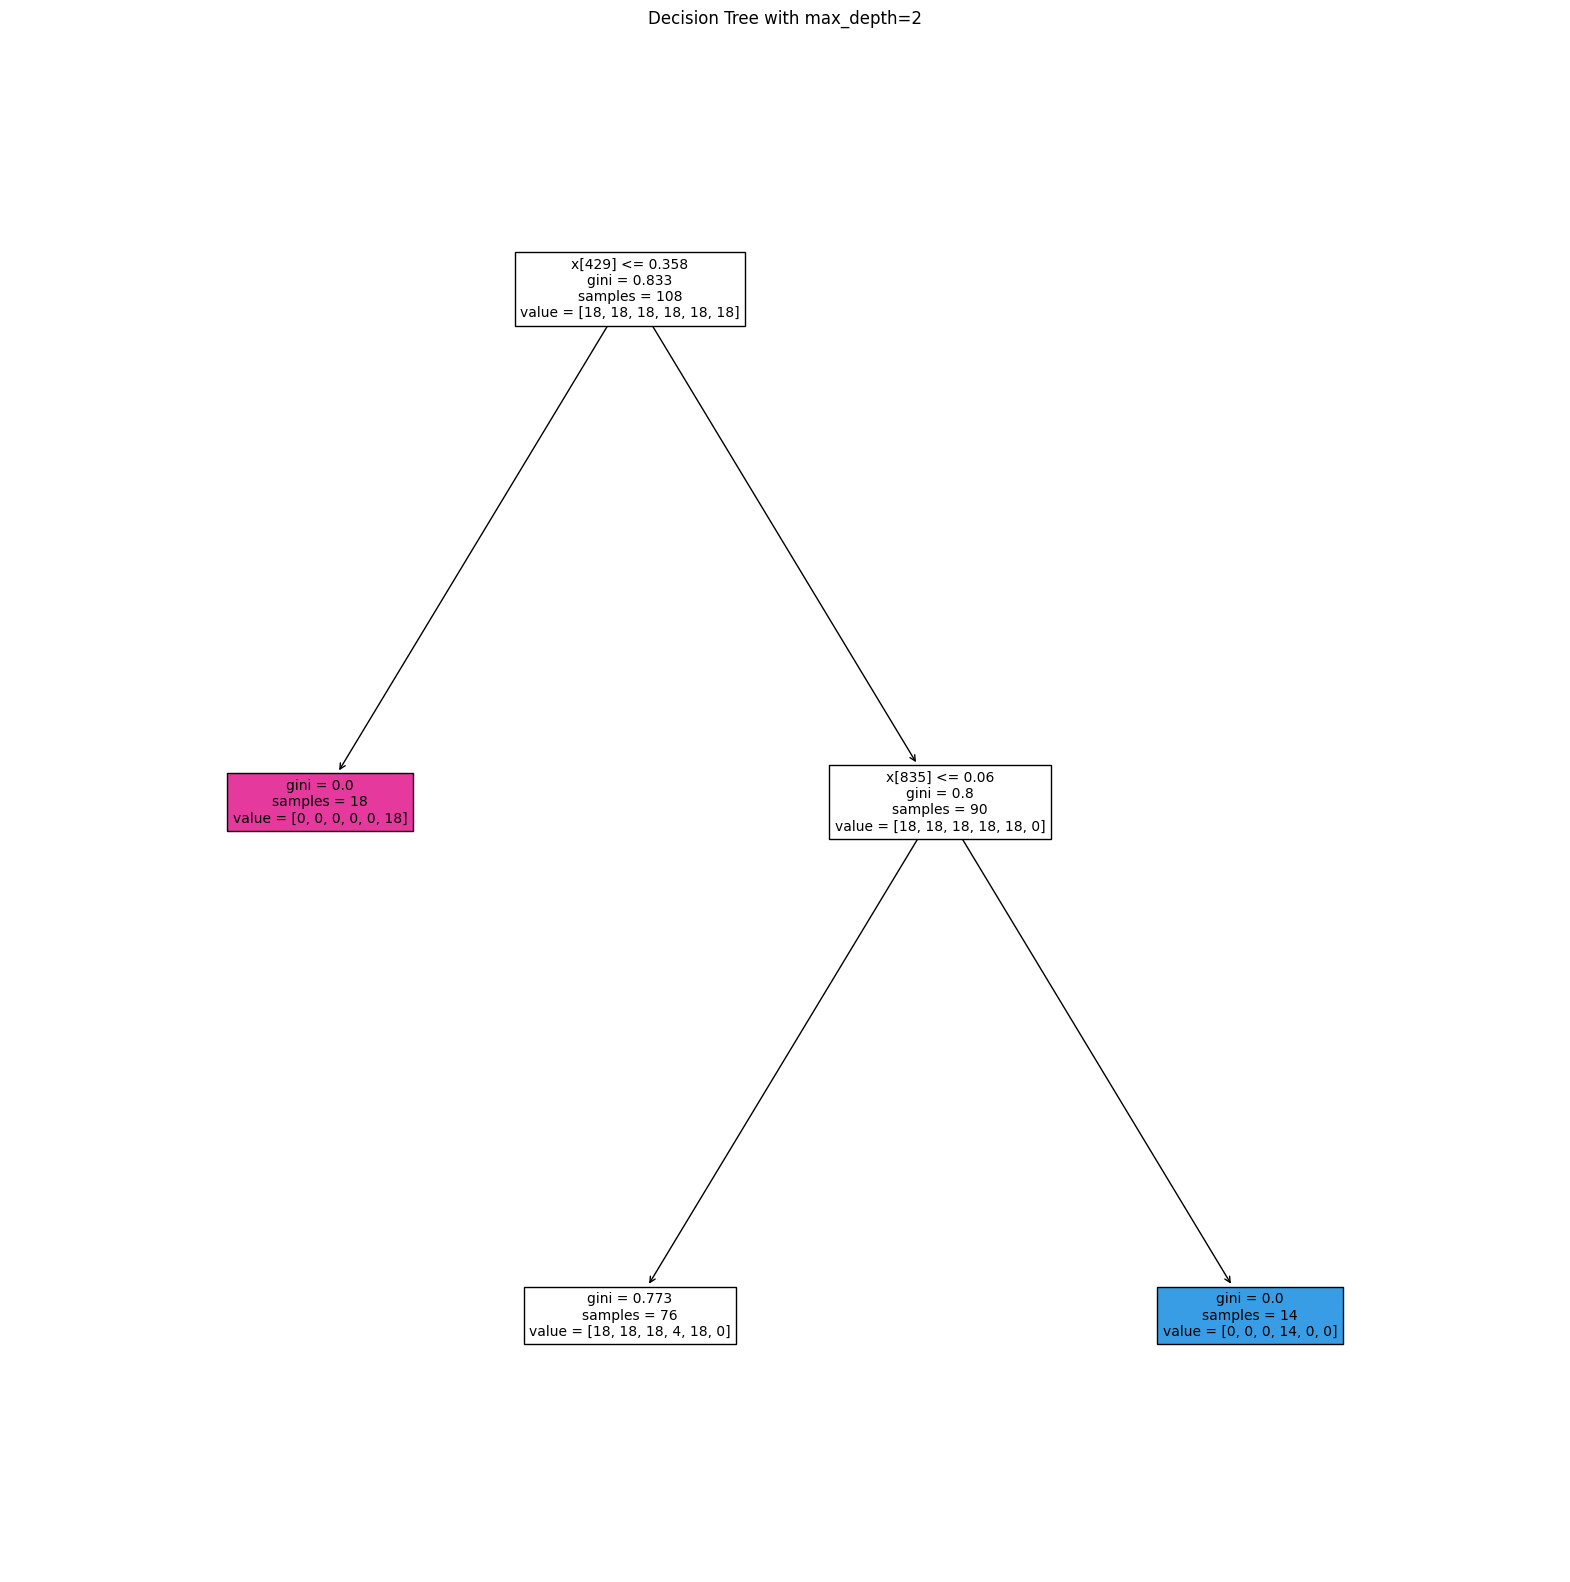

Accuracy Score: 0.4444444444444444
Recall Scores for Decision Tree (max_depth=2):
Recall for class LAY: 0.8333
Recall for class SIT: 0.0000
Recall for class STAND: 0.0000
Recall for class WALK: 0.8333
Recall for class W_D: 0.0000
Recall for class W_U: 1.0000


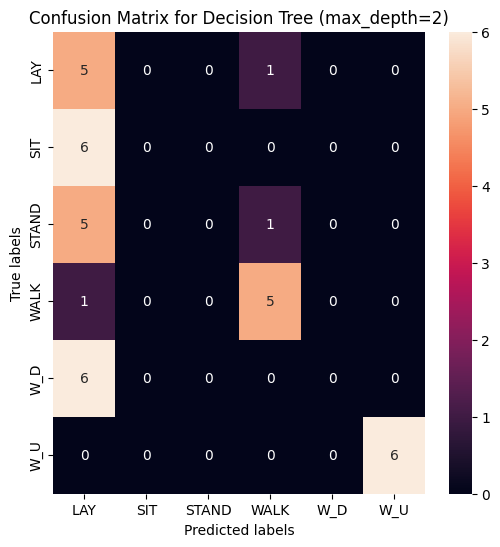

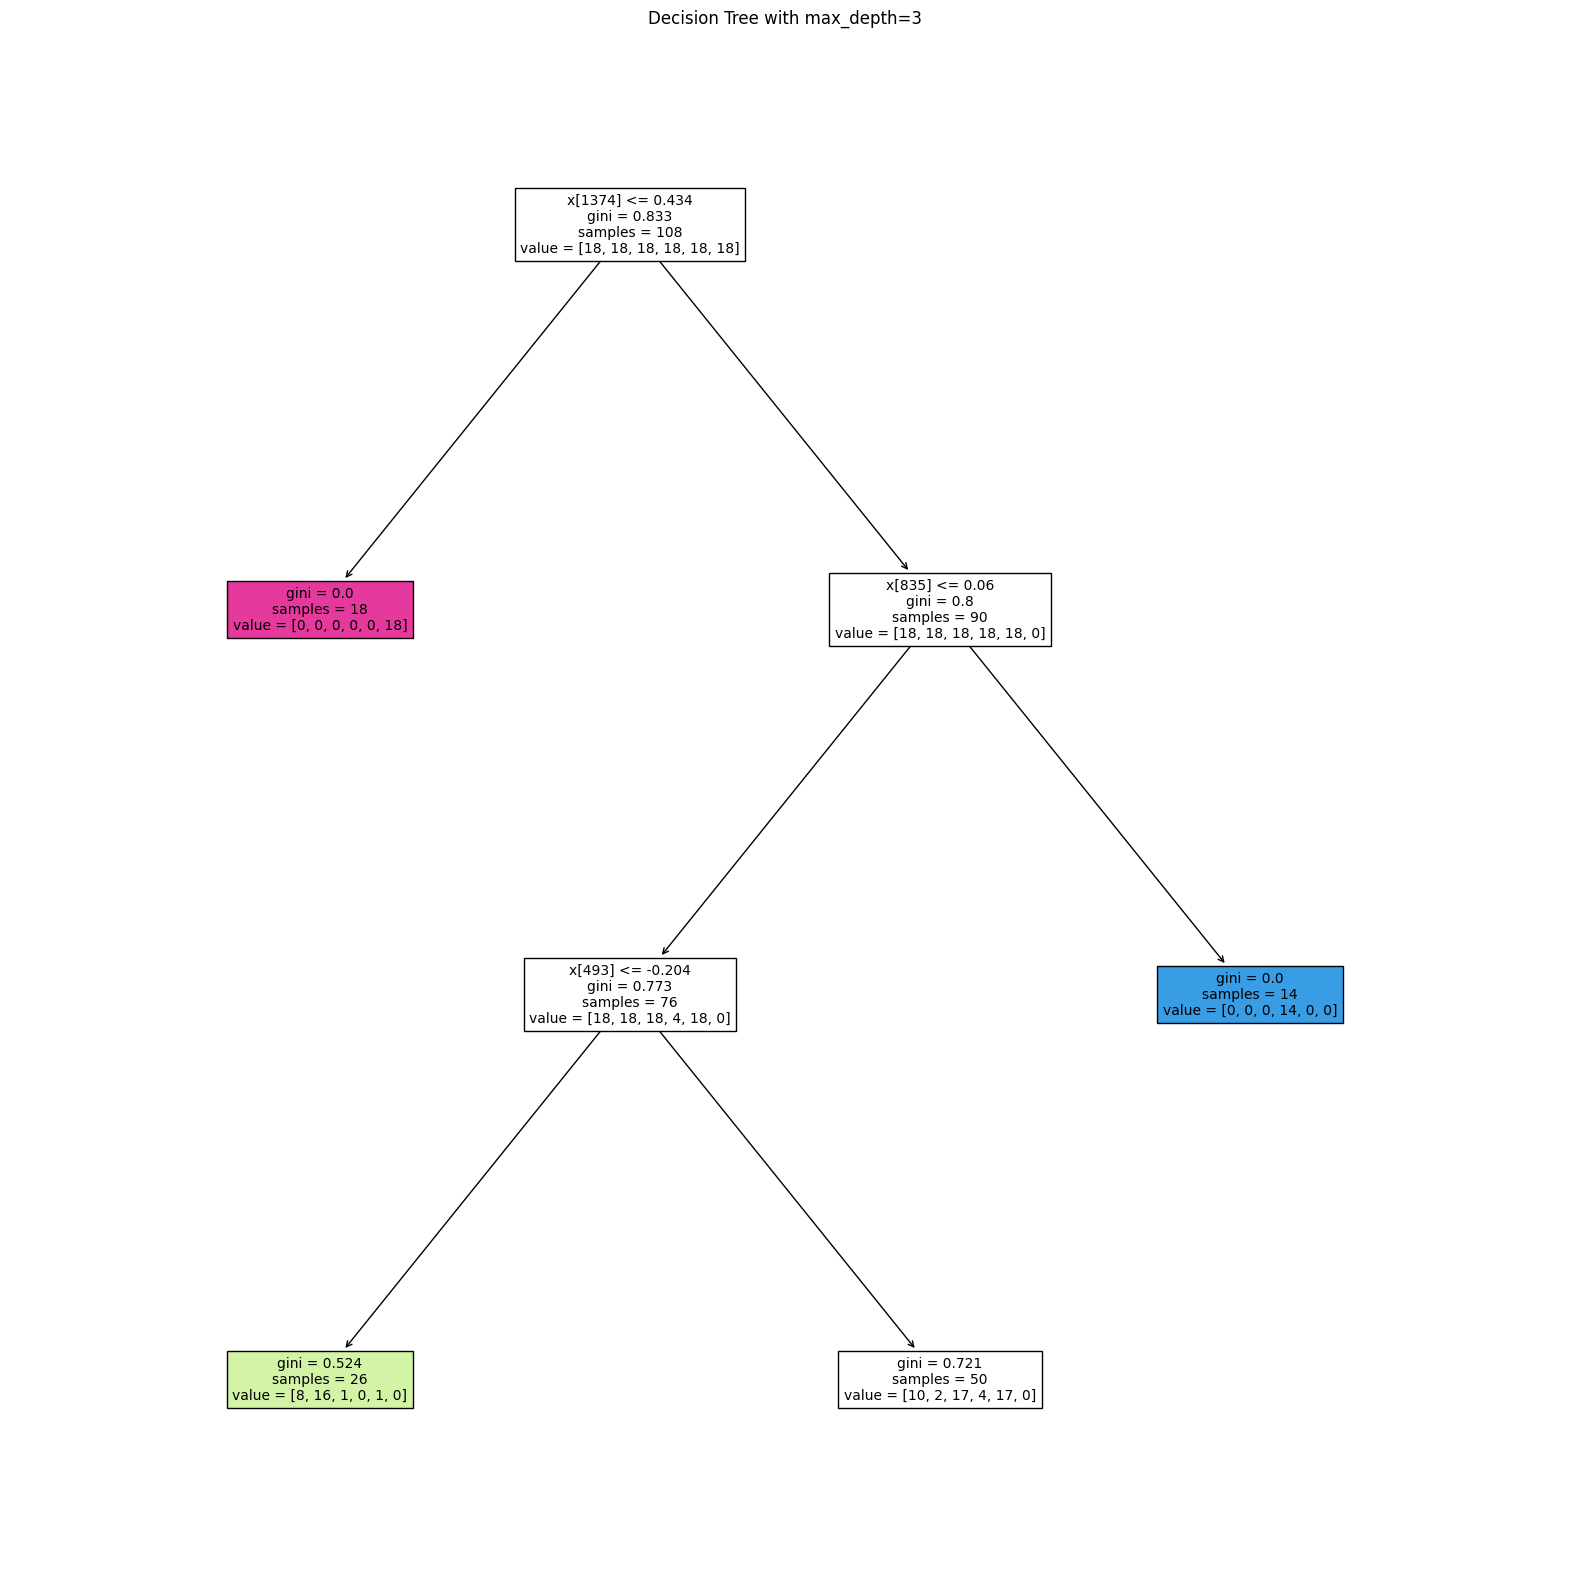

Accuracy Score: 0.4444444444444444
Recall Scores for Decision Tree (max_depth=3):
Recall for class LAY: 0.0000
Recall for class SIT: 0.3333
Recall for class STAND: 0.5000
Recall for class WALK: 0.8333
Recall for class W_D: 0.0000
Recall for class W_U: 1.0000


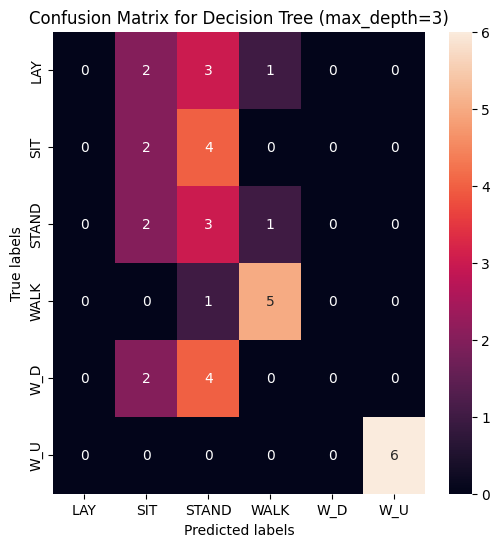

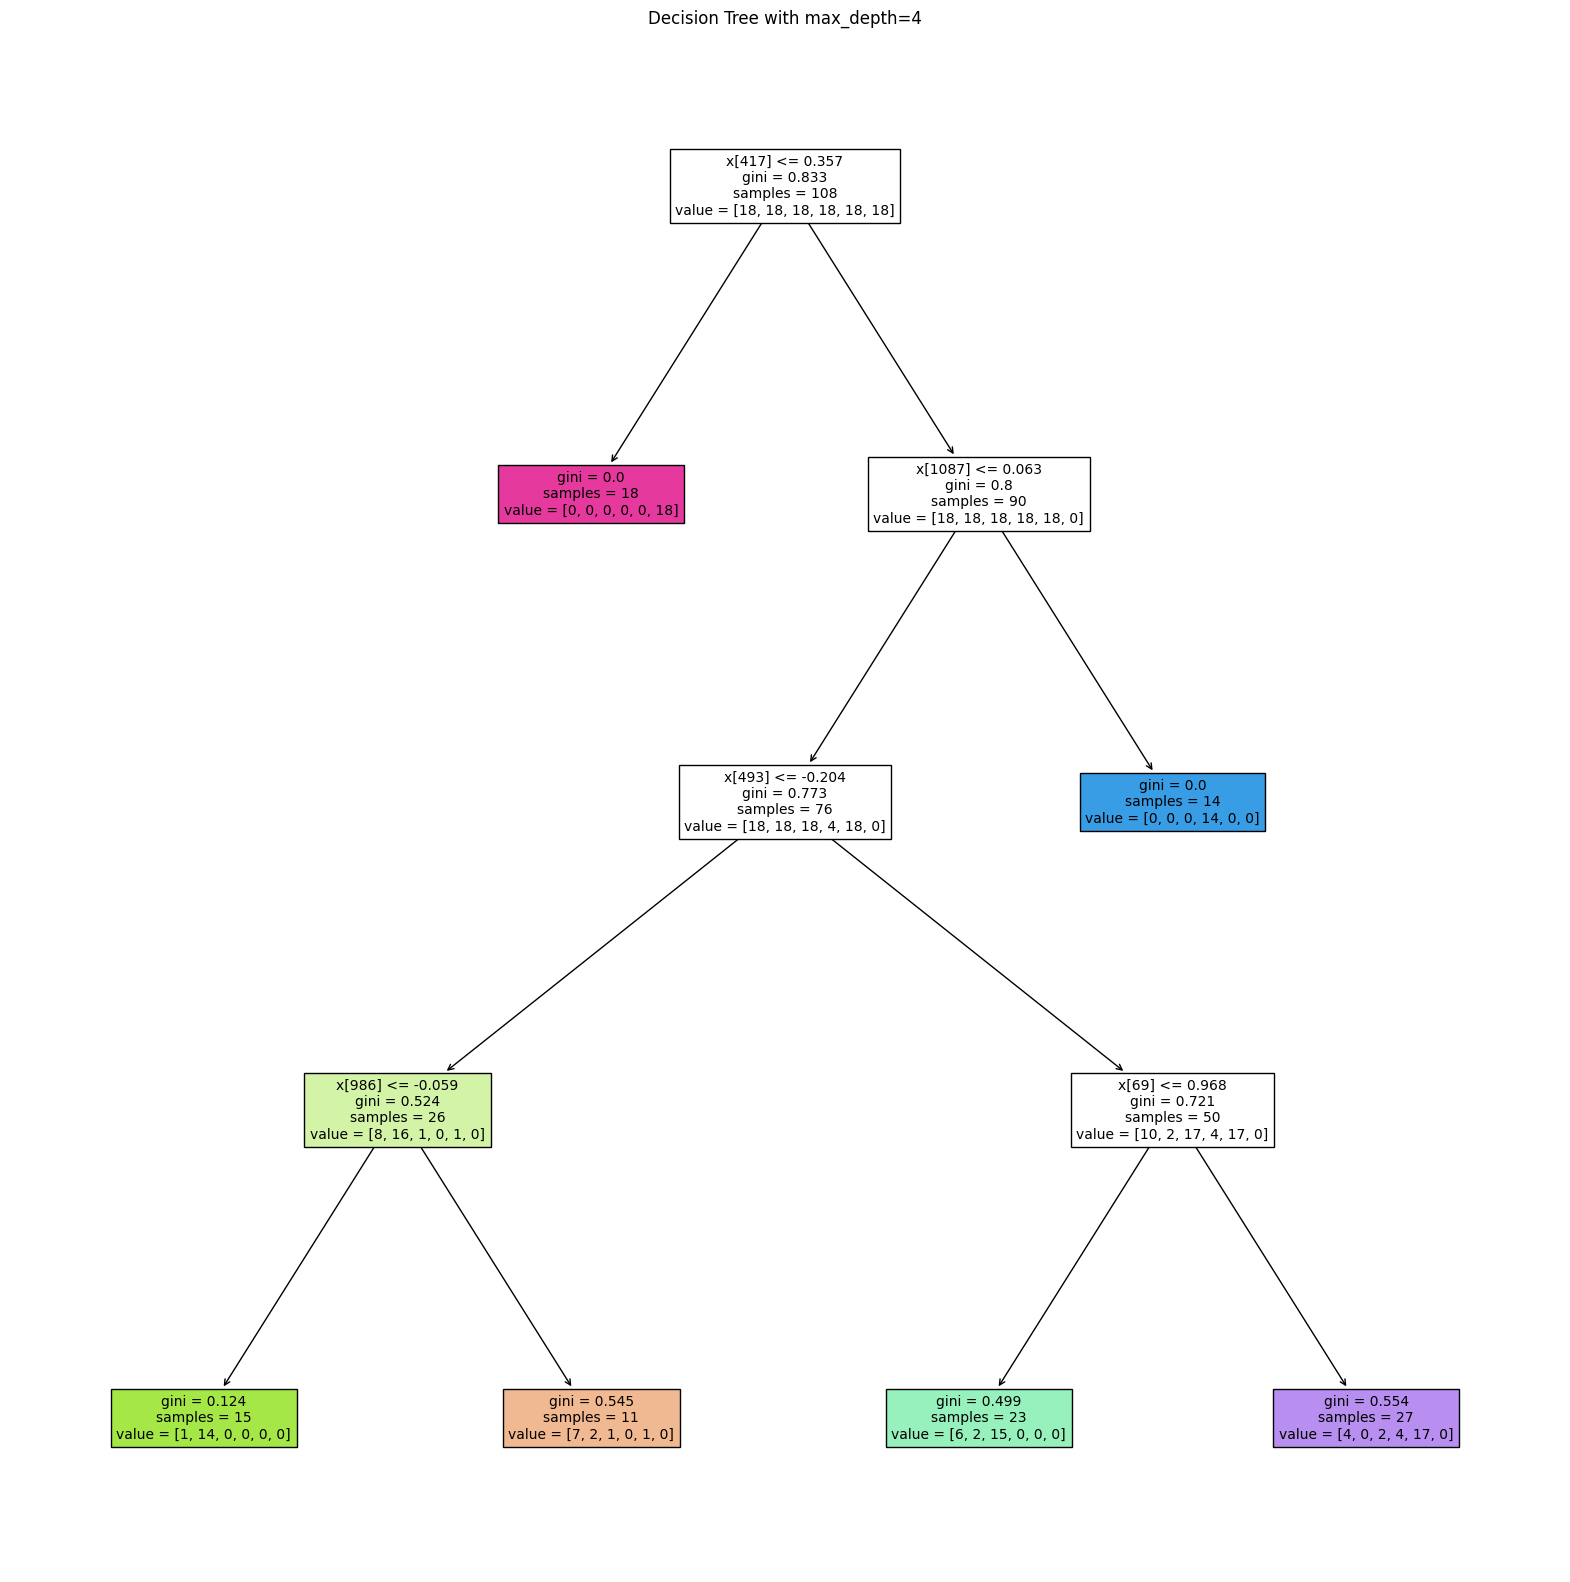

Accuracy Score: 0.4722222222222222
Recall Scores for Decision Tree (max_depth=4):
Recall for class LAY: 0.0000
Recall for class SIT: 0.1667
Recall for class STAND: 0.3333
Recall for class WALK: 0.8333
Recall for class W_D: 0.5000
Recall for class W_U: 1.0000


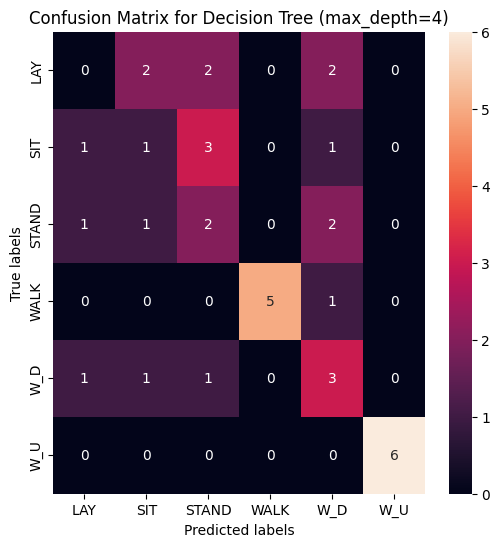

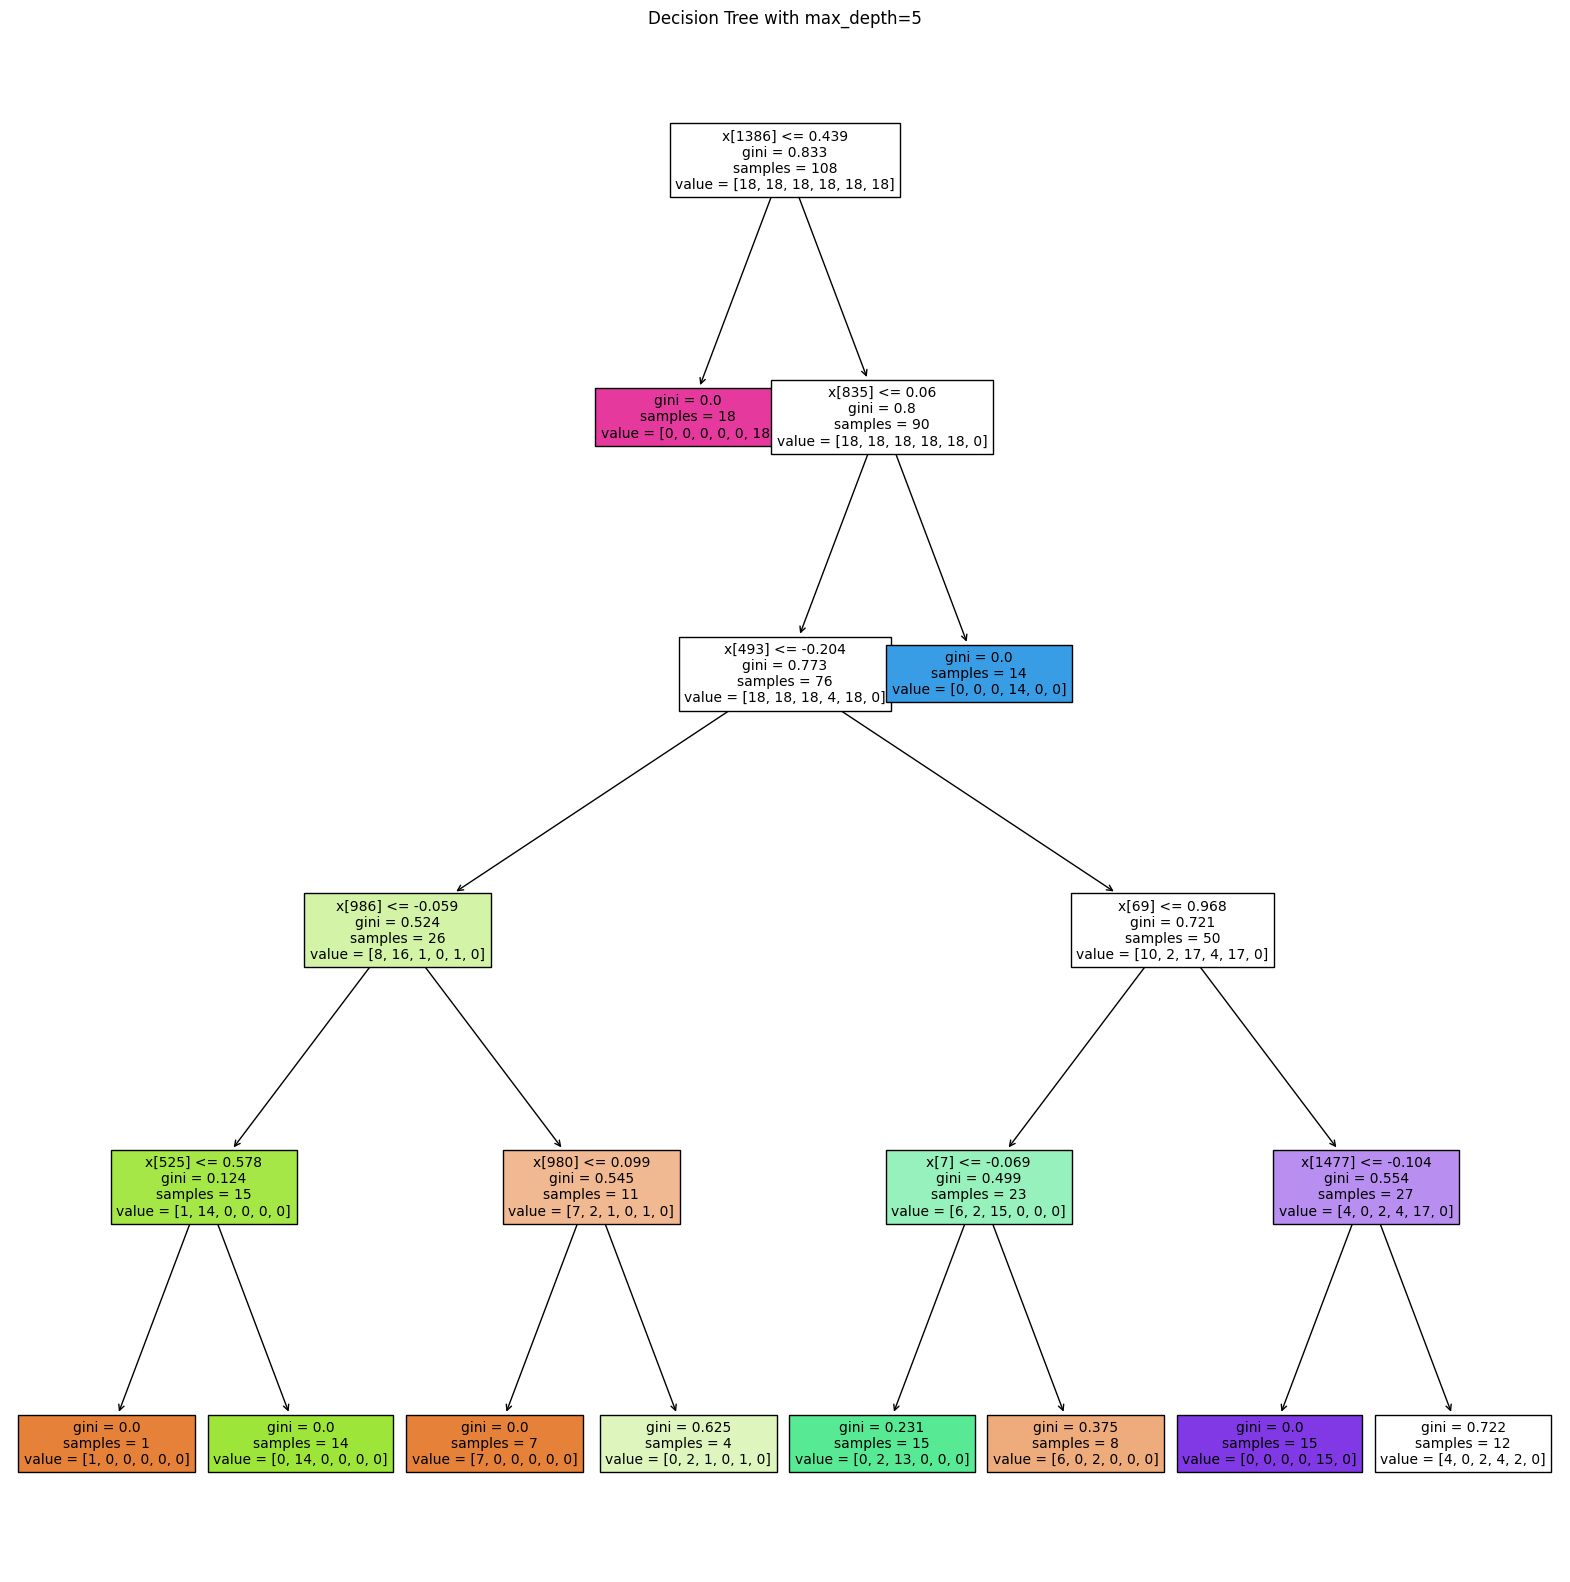

Accuracy Score: 0.4444444444444444
Recall Scores for Decision Tree (max_depth=5):
Recall for class LAY: 0.1667
Recall for class SIT: 0.3333
Recall for class STAND: 0.1667
Recall for class WALK: 0.8333
Recall for class W_D: 0.1667
Recall for class W_U: 1.0000


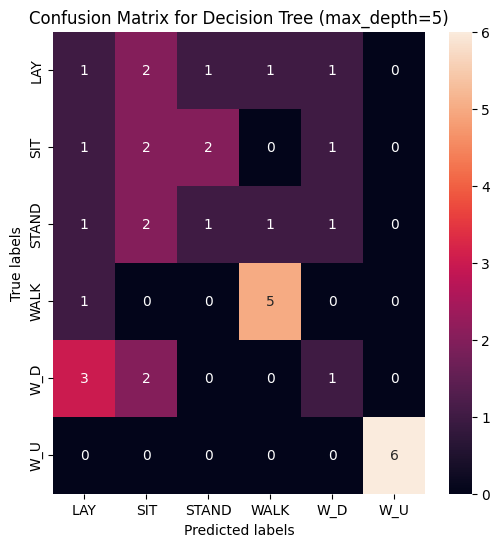

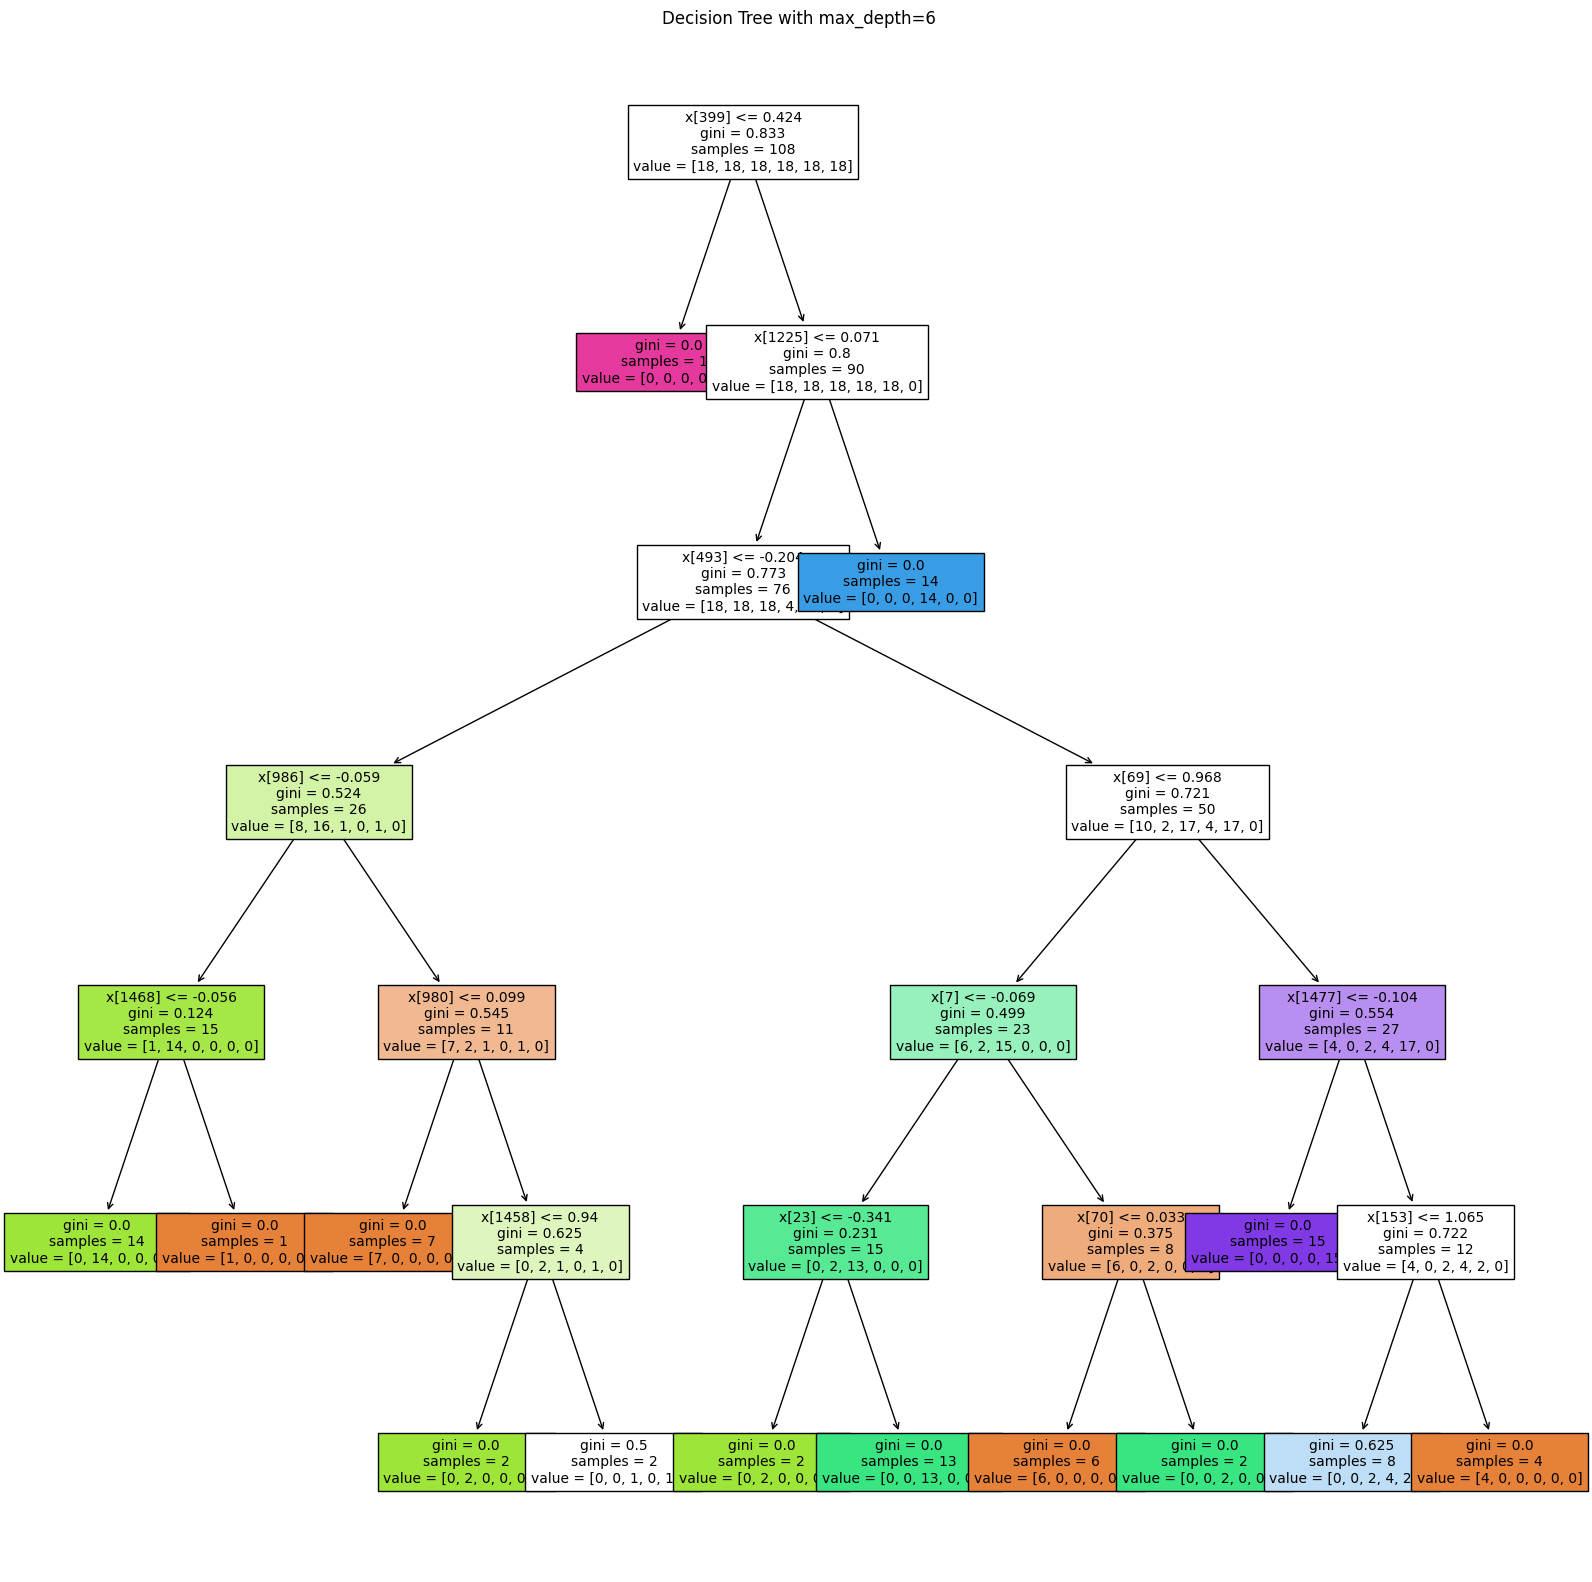

Accuracy Score: 0.5833333333333334
Recall Scores for Decision Tree (max_depth=6):
Recall for class LAY: 0.5000
Recall for class SIT: 0.5000
Recall for class STAND: 0.3333
Recall for class WALK: 1.0000
Recall for class W_D: 0.1667
Recall for class W_U: 1.0000


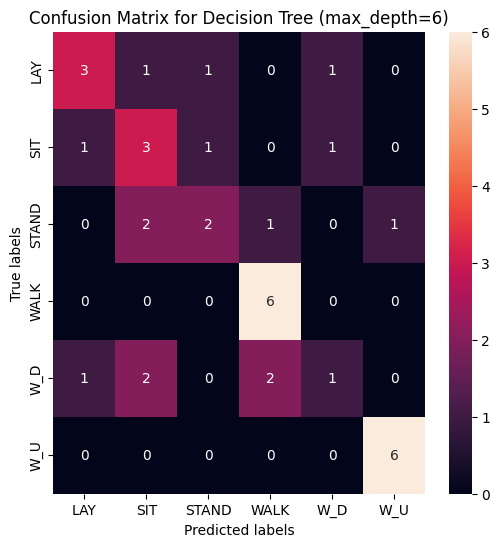

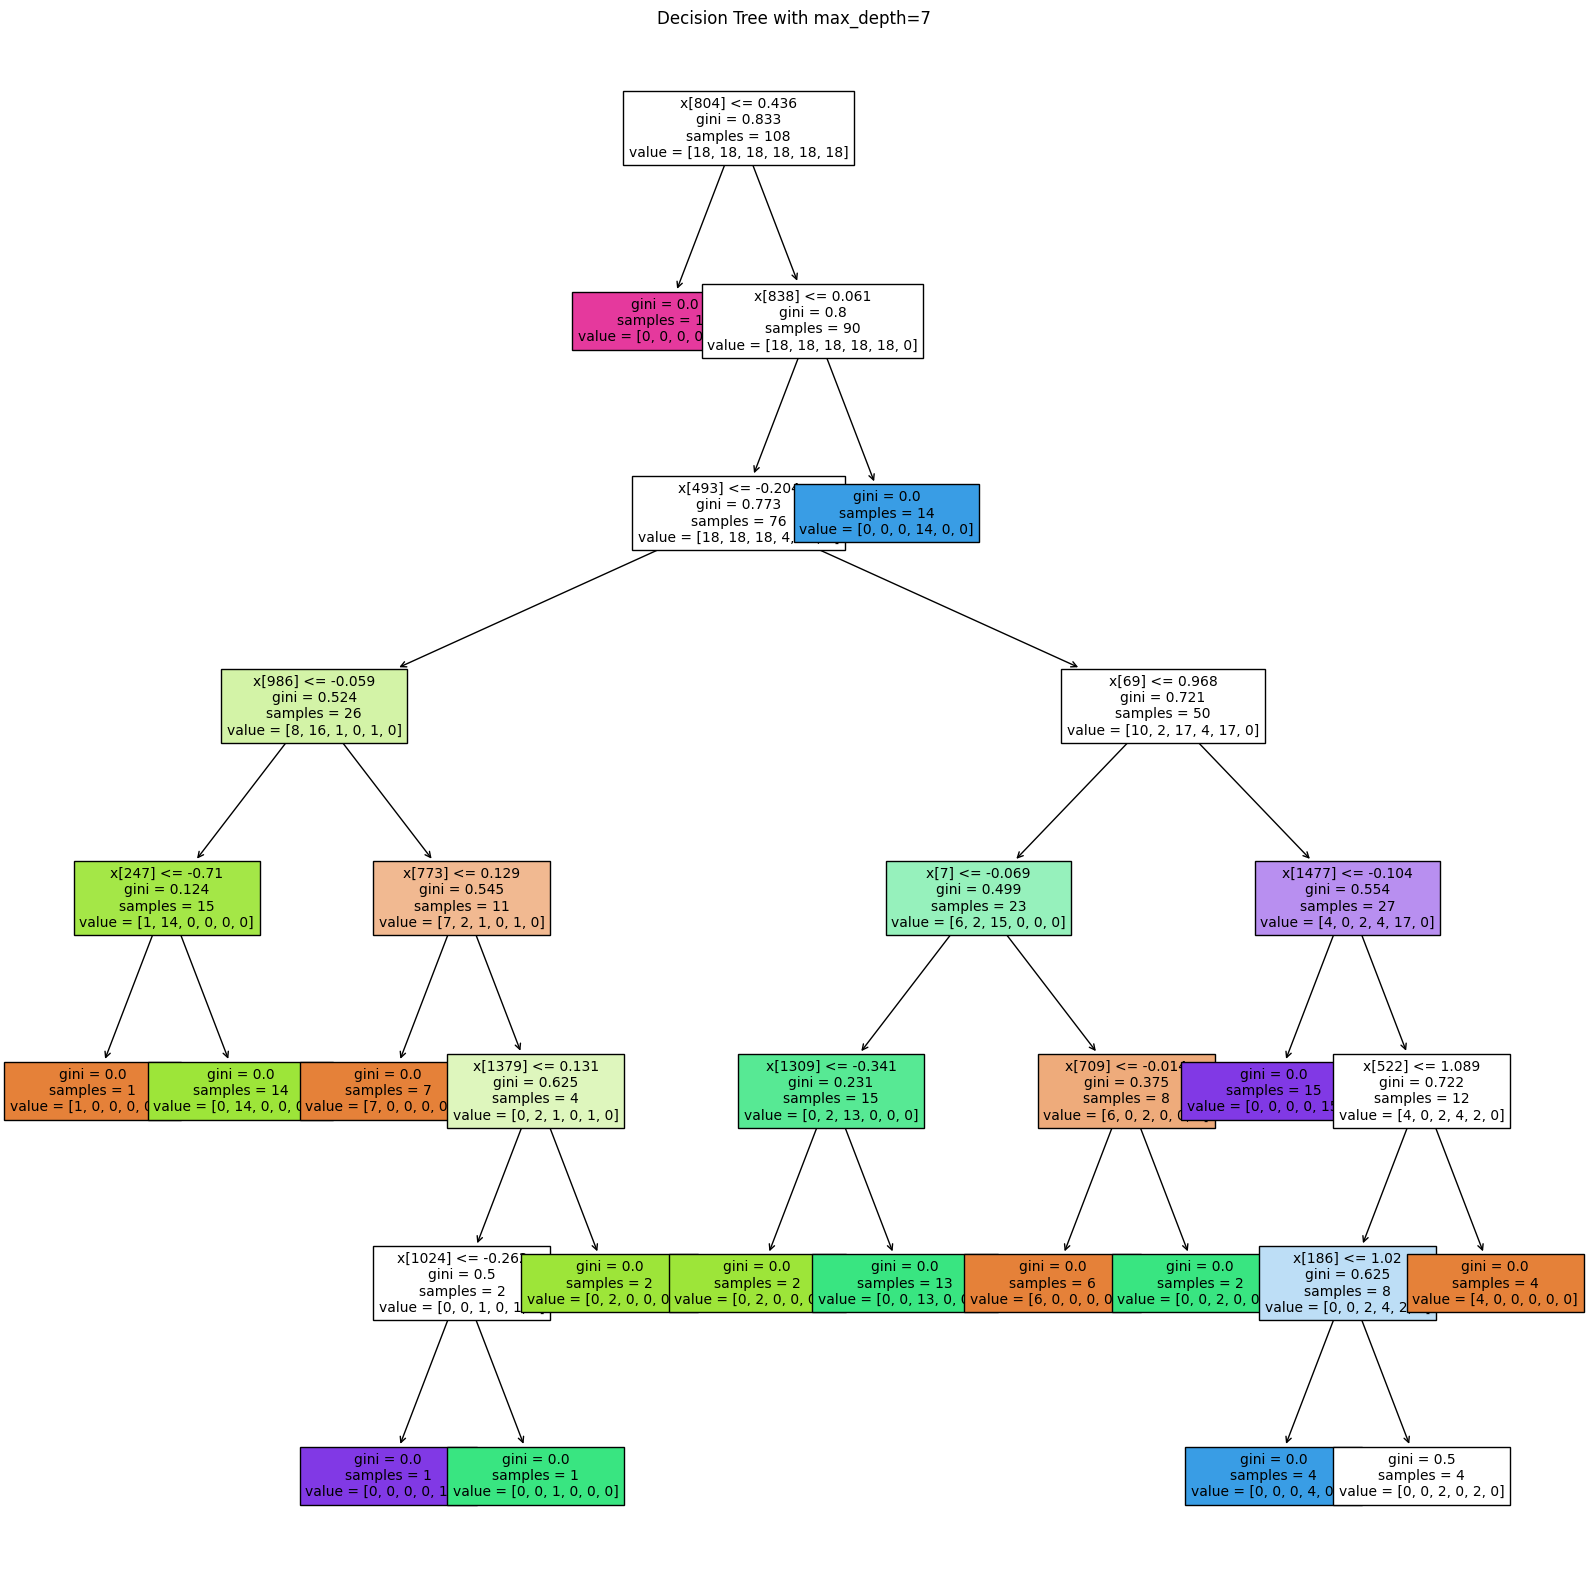

Accuracy Score: 0.4444444444444444
Recall Scores for Decision Tree (max_depth=7):
Recall for class LAY: 0.0000
Recall for class SIT: 0.1667
Recall for class STAND: 0.3333
Recall for class WALK: 1.0000
Recall for class W_D: 0.1667
Recall for class W_U: 1.0000


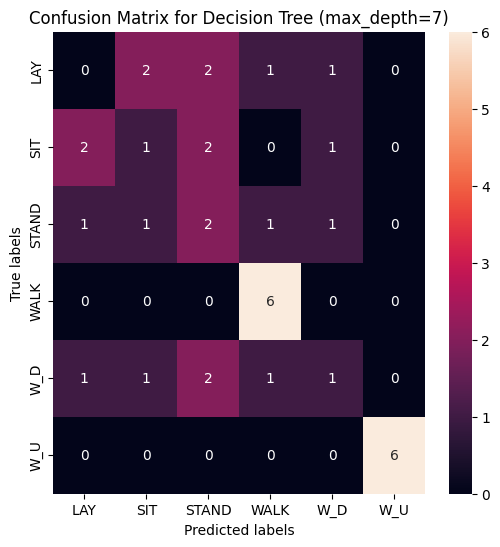

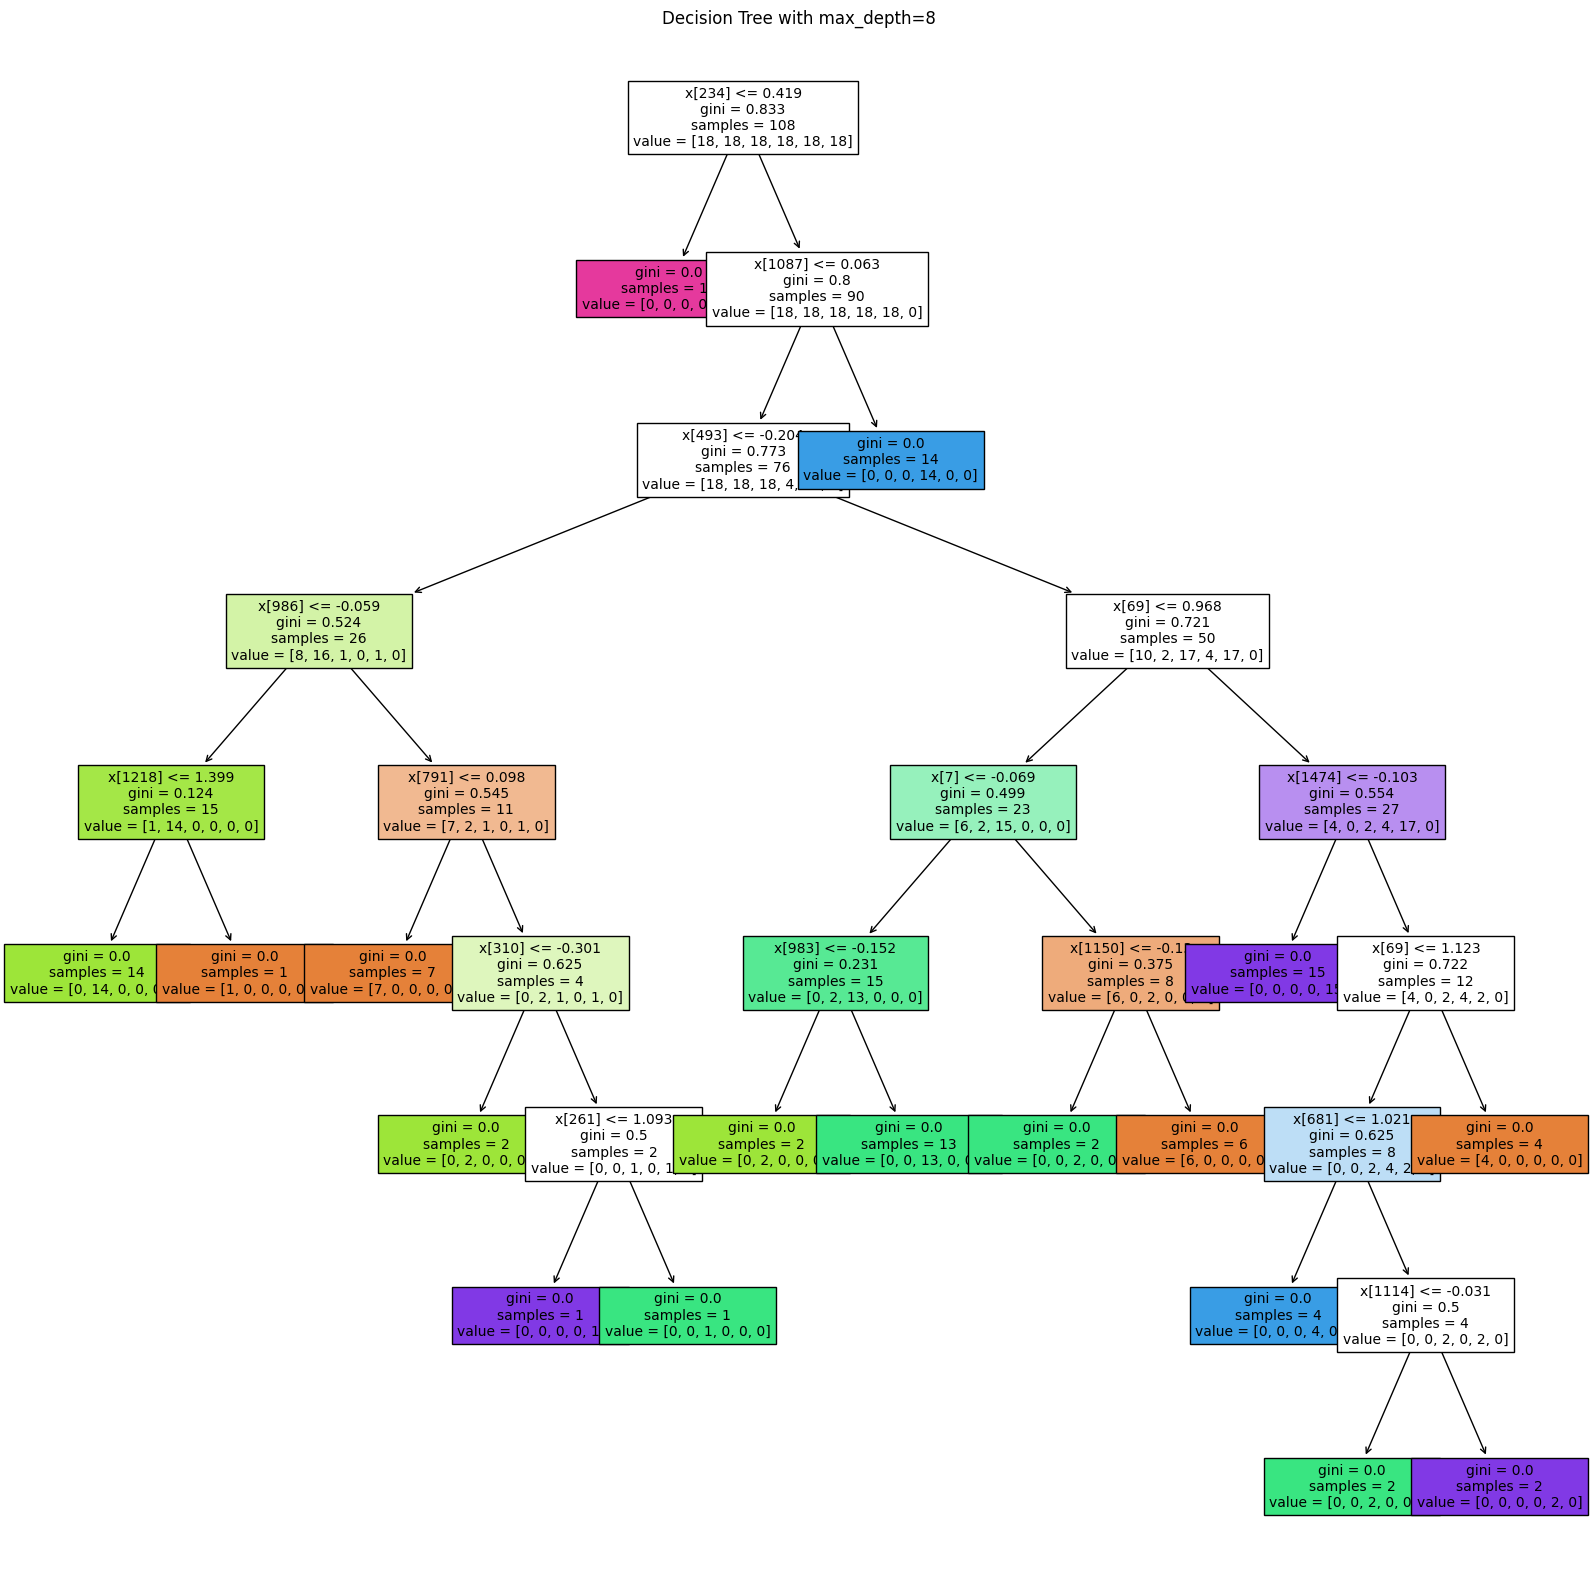

Accuracy Score: 0.5
Recall Scores for Decision Tree (max_depth=8):
Recall for class LAY: 0.1667
Recall for class SIT: 0.1667
Recall for class STAND: 0.3333
Recall for class WALK: 1.0000
Recall for class W_D: 0.3333
Recall for class W_U: 1.0000


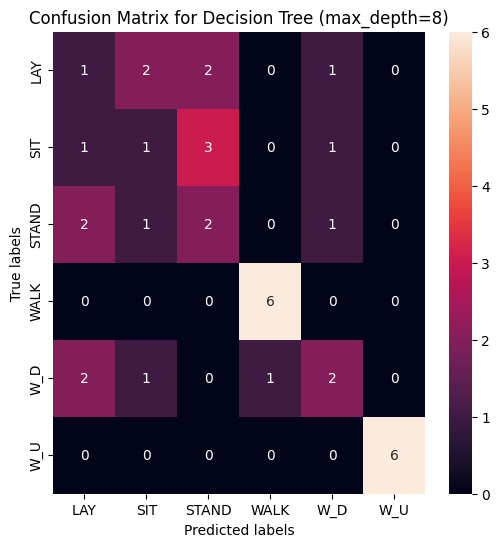

In [10]:
label_names = ["LAY", "SIT", "STAND", "WALK", "W_D", "W_U"]
accuracy_values = []
recall_scores = []
for i in range(2, 9):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain, ytrain)

    # Plot individual decision tree
    plt.figure(figsize=(20, 20))
    plot_tree(dt, filled=True, fontsize=10)
    plt.title(f'Decision Tree with max_depth={i}')
    plt.show()

    # Evaluate the model
    yPred = dt.predict(X_test.reshape(36, 1500))
    acc=accuracy_score(y_test, yPred)
    print("Accuracy Score:", acc)
    accuracy_values.append(accuracy_score(y_test, yPred))
    label_names1 = [1, 2, 3, 4, 5, 6]

    recall_per_class = recall_score(y_test, yPred, labels=label_names1, average=None)

    # Print recall for each class
    print(f'Recall Scores for Decision Tree (max_depth={i}):')
    for j, recall in enumerate(recall_per_class):
        print(f'Recall for class {label_names[j]}: {recall:.4f}')

    recall_scores.append(recall_score(y_test, yPred, average='weighted'))


    # Plot confusion matrix
    cm = confusion_matrix(y_test, yPred, labels=[1, 2, 3, 4, 5, 6])
    plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for Decision Tree (max_depth={i})')

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    ax.xaxis.set_ticklabels(label_names)
    ax.yaxis.set_ticklabels(label_names)
    plt.show()   


## Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained.

##### The accuracy increases as the depth increases. This is because increasing the depth of a decision tree, it becomes more complex and can capture more intricate patterns in the training data. A deeper tree can potentially fit the training data more closely, achieving higher accuracy on the training set. However, deeper trees are more prone to overfitting, which can lead to poor generalization performance on the test set. This is evident in the plot above, Initially, as you increase the depth, the model might become better at fitting the training data, resulting in improved accuracy on the training set. However, beyond a certain depth, the model starts memorizing the training data and lead to a decrease in accuracy on new, unseen data (test set).

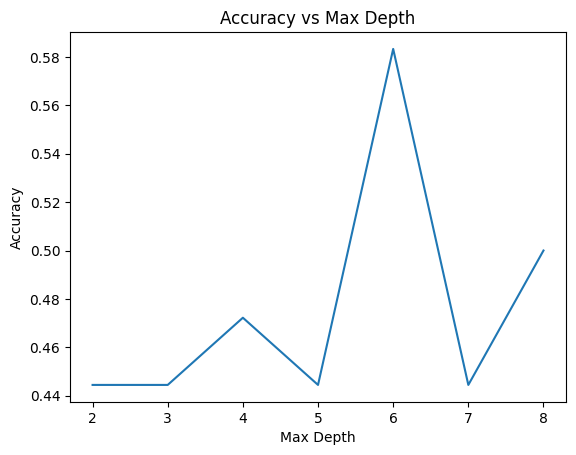

In [11]:
plt.plot(range(2, 9), accuracy_values)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()


## Q4. Does the accuracy changes when the depth is increased? Reason why such a result has been obtained?

### Implement Principal Component Analysis (PCA) on the accelation data and plots

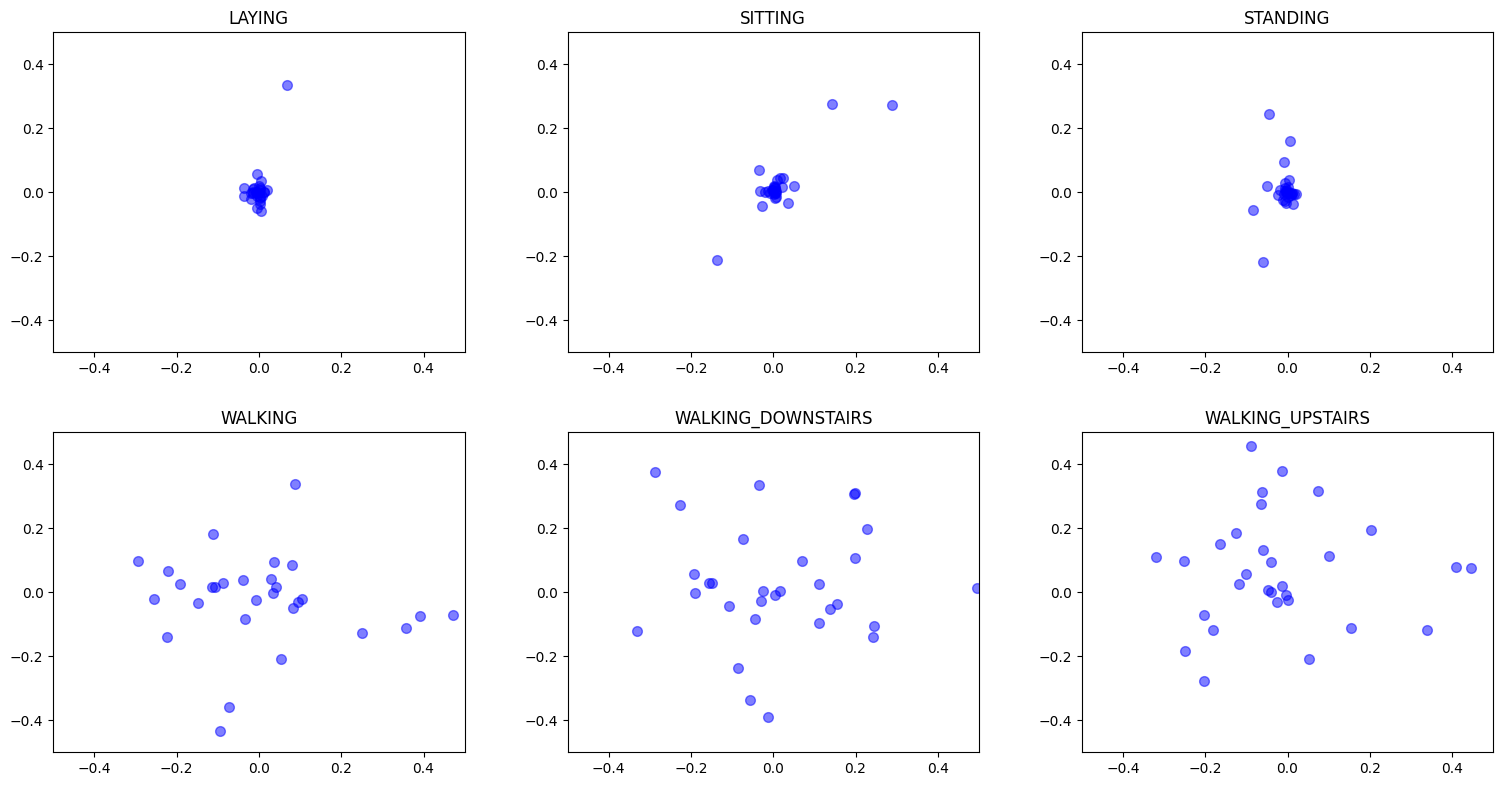

In [12]:
pca_acceleration = PCA(n_components=2)
dataset_dir1 = os.path.join(combined_dir,"Train")
dataset_dir2 = os.path.join(combined_dir,"Test")

figure, axis = plt.subplots(2, 3, figsize = (8,4))

folder_count = 0
activity_count = 0

for folder in folders:
    acc_data=[] 
    for dataset_dir in [dataset_dir1, dataset_dir2]:
        files = os.listdir(os.path.join(dataset_dir,folder))

        count = 0

        for file in files:
          
            df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
            df = df[offset:offset+time*50]

            df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

            acc_data.append(df["linacc"].values)
        
    principalComponents_acceleration = pca_acceleration.fit(np.array(acc_data).transpose())

    data = pca_acceleration.components_
    axis[folder_count, activity_count].plot(data[0], data[1], 'o', markersize=7, color='blue', alpha=0.5)
    axis[folder_count, activity_count].set_title(folder)
    axis[folder_count, activity_count].set_xlim(-0.5,0.5)
    axis[folder_count, activity_count].set_ylim(-0.5,0.5)
        
    activity_count += 1
    if activity_count == 3:
        activity_count = 0
        folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.25)
plt.show()

### Use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference?

In [13]:
import tsfel
cfg = tsfel.get_features_by_domain()
pca_acceleration = PCA(n_components=2)

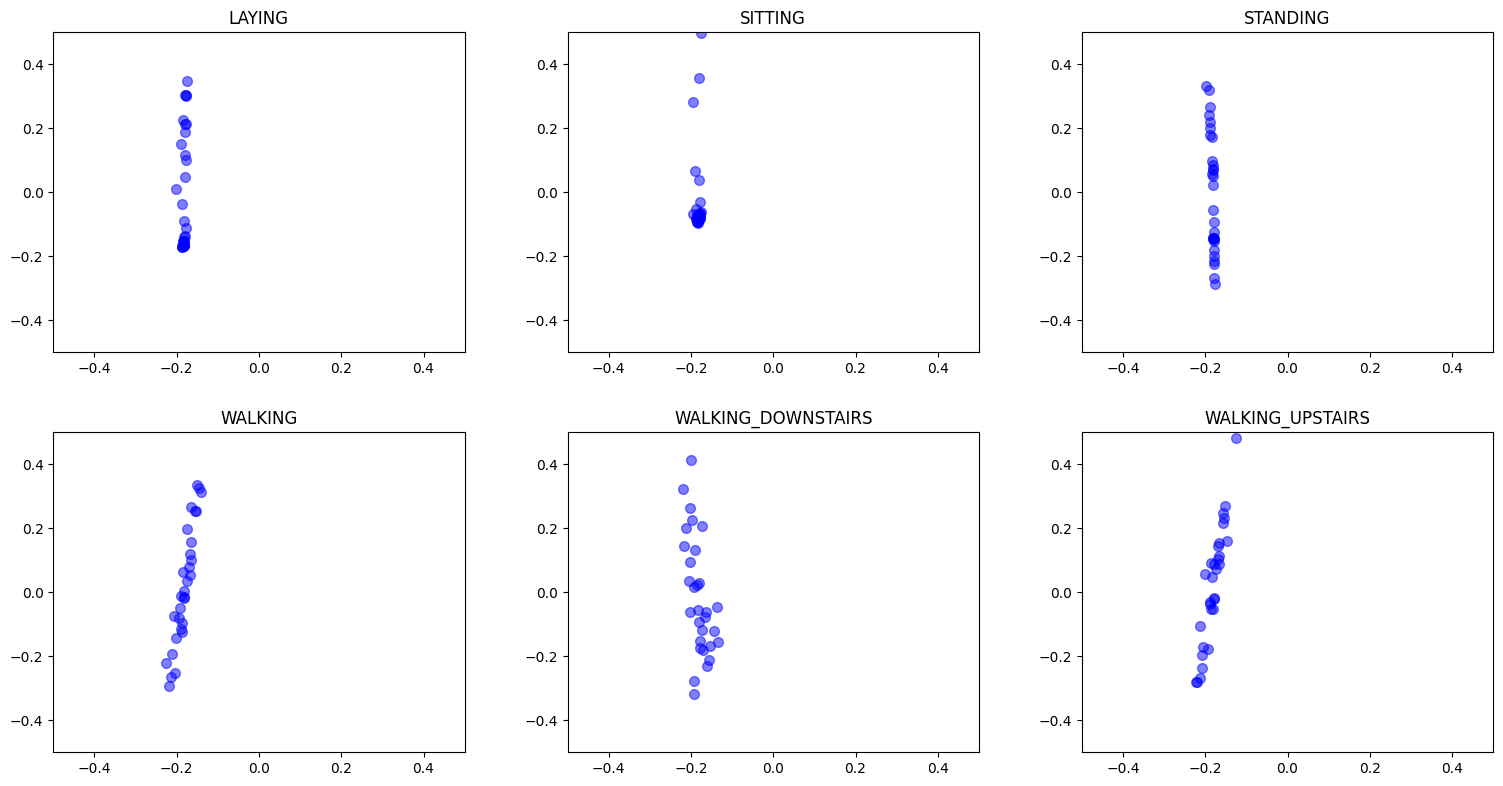

In [14]:
dataset_dir1 = os.path.join(combined_dir,"Train")
dataset_dir2 = os.path.join(combined_dir,"Test")

figure, axis = plt.subplots(2, 3, figsize = (8,4))

folder_count = 0
activity_count = 0

# for folder in ["LAYING"]:
for folder in folders:
    acc_data_tsfel = []
    for dataset_dir in [dataset_dir1, dataset_dir2]:
        files = os.listdir(os.path.join(dataset_dir,folder))
        count = 0
        for file in files:
            
            df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
            df = df[offset:offset+time*50]

            df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

            acc_data_tsfel.append(df["linacc"].values)
    
    acc_data_tsfel_features = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, verbose = 1)   
    IPython.display.clear_output()
 
    principalComponents_acceleration = pca_acceleration.fit(np.array(acc_data_tsfel_features).transpose())
    data = pca_acceleration.components_
    axis[folder_count, activity_count].plot(data[0], data[1], 'o', markersize=7, color='blue', alpha=0.5)
    axis[folder_count, activity_count].set_title(folder)
    axis[folder_count, activity_count].set_xlim(-0.5,0.5)
    axis[folder_count, activity_count].set_ylim(-0.5,0.5)

    activity_count += 1
    if activity_count == 3:
        activity_count = 0
        folder_count += 1

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1.8, 
                    top=1.8, 
                    wspace=0.25, 
                    hspace=0.25)
plt.show()

##### Normalize the extracted features it is doing before applying PCA to ensure that all features contribute equally. We can observe clear separation between classes, it indicates that the features used are effective in capturing distinctive patterns for each activity.

## Q.6 Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set.

In [15]:
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

In [16]:
count_files = 1
for folder in folders:
    files = os.listdir(os.path.join(combined_dir,"Train",folder))
    for file in files:
        count_files += 1
count_files

X_train_tsfel = []
y_train_tsfel = []

dataset_dir = os.path.join(combined_dir,"Train")


for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:
        acc_data_tsfel = [] 
        print("Remaining Files: ", count_files)
        count_files -= 1    
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        acc_data_tsfel.append(df["linacc"].values)

        tsfel_features = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, verbose=1)
        IPython.display.clear_output()
        
        X_train_tsfel.append(tsfel_features)
        y_train_tsfel.append(classes[folder])
print(tsfel_features.shape)
X_train_tsfel_tmp = np.array(X_train_tsfel)
X_train_tsfel = np.array(X_train_tsfel).reshape(126, 384)
print(X_train_tsfel_tmp.shape)
print(X_train_tsfel.shape)
y_train_tsfel = np.array(y_train_tsfel)
print(y_train_tsfel.shape)

(1, 384)
(126, 1, 384)
(126, 384)
(126,)


In [17]:
count_files = 1
for folder in folders:
    files = os.listdir(os.path.join(combined_dir,"Test",folder))
    for file in files:
        count_files += 1

X_test_tsfel = []
y_test_tsfel = []

dataset_dir = os.path.join(combined_dir,"Test")


for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:
        acc_data_tsfel = [] 
        print("Remaining Files: ", count_files)
        count_files -= 1    
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        df["linacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

        acc_data_tsfel.append(df["linacc"].values)

        tsfel_features = tsfel.time_series_features_extractor(cfg, acc_data_tsfel, verbose=1)
        IPython.display.clear_output()
        
        X_test_tsfel.append(tsfel_features)
        y_test_tsfel.append(classes[folder])

print(tsfel_features.shape)
X_test_tsfel_tmp = np.array(X_test_tsfel)
X_test_tsfel = np.array(X_test_tsfel).reshape(54, 384)
print(X_test_tsfel_tmp.shape)
print(X_test_tsfel.shape)
y_test_tsfel = np.array(y_test_tsfel)
print(y_test_tsfel.shape)

(1, 384)
(54, 1, 384)
(54, 384)
(54,)


In [18]:

X = np.concatenate((X_train_tsfel,X_test_tsfel))
y = np.concatenate((y_train_tsfel,y_test_tsfel))
X_train_tsfel,X_test_tsfel,y_train_tsfel,y_test_tsfel = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
print("Training data shape: ",X_train_tsfel.shape)
print("Testing data shape: ",X_test_tsfel.shape)
print("Training data shape: ",y_train_tsfel.shape)
print("Testing data shape: ",y_test_tsfel.shape)

Training data shape:  (108, 384)
Testing data shape:  (72, 384)
Training data shape:  (108,)
Testing data shape:  (72,)


In [19]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_values_tsfel = []

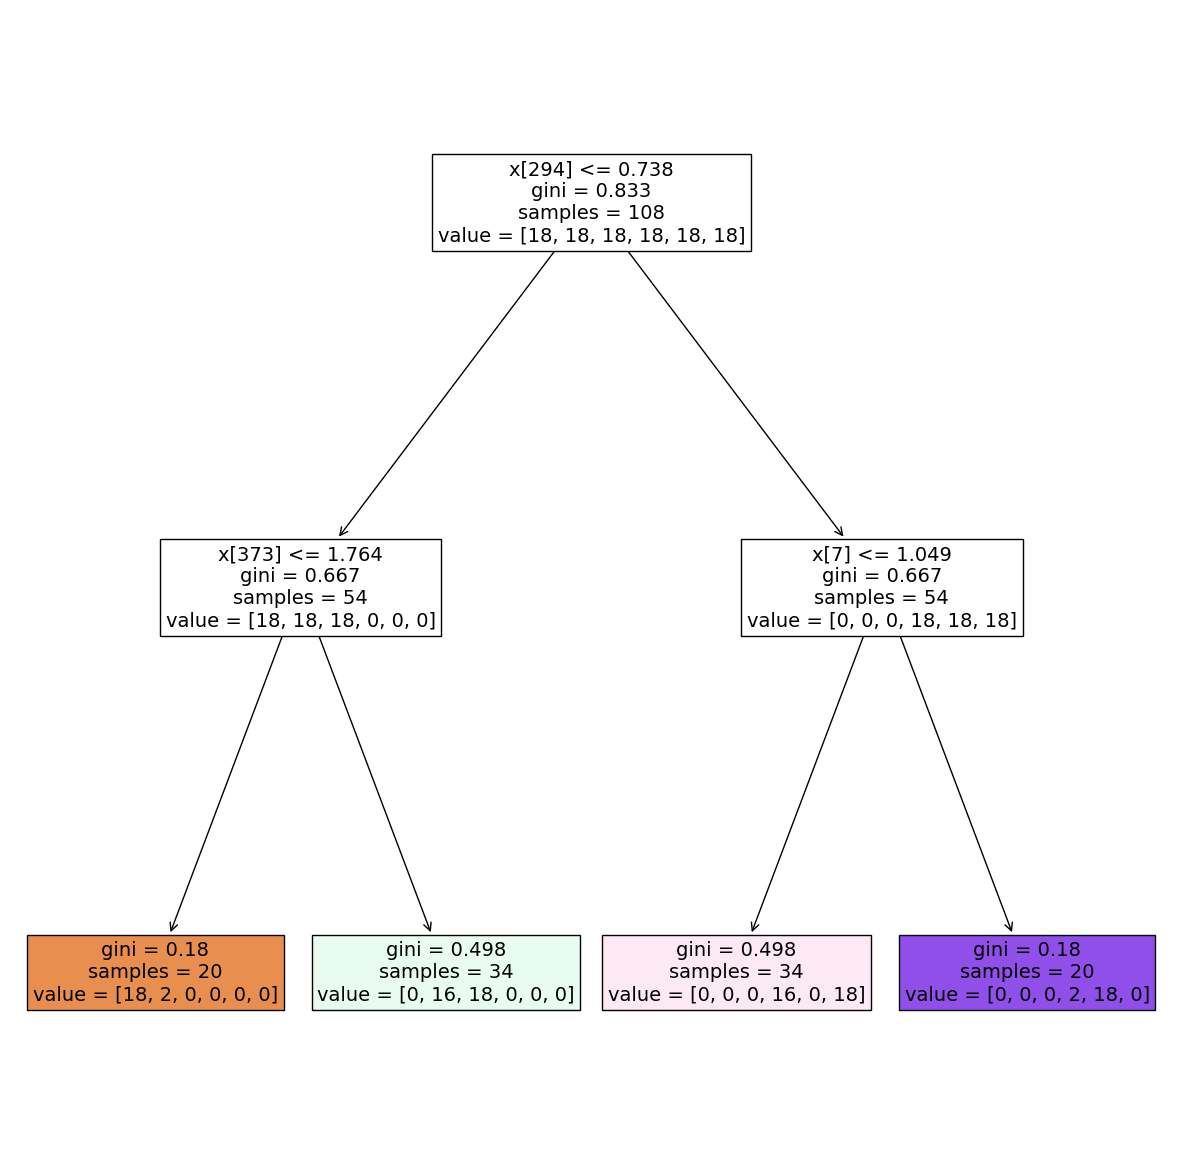

Accuracy Score: 0.6388888888888888


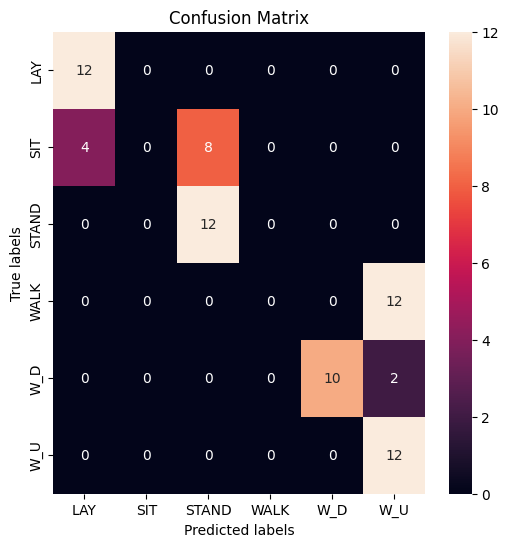

In [20]:
dt_tsfel2 = DecisionTreeClassifier(max_depth=2)
dt_tsfel2.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(15,15))
plot_tree(dt_tsfel2, filled=True, fontsize=14)
plt.show()
yPred_tsfel = dt_tsfel2.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
cm9= confusion_matrix(y_test_tsfel, yPred_tsfel)
plt.figure(figsize=(6,6))
ax= plt.subplot()
sns.heatmap(cm9, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10) 

ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()

### Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question.

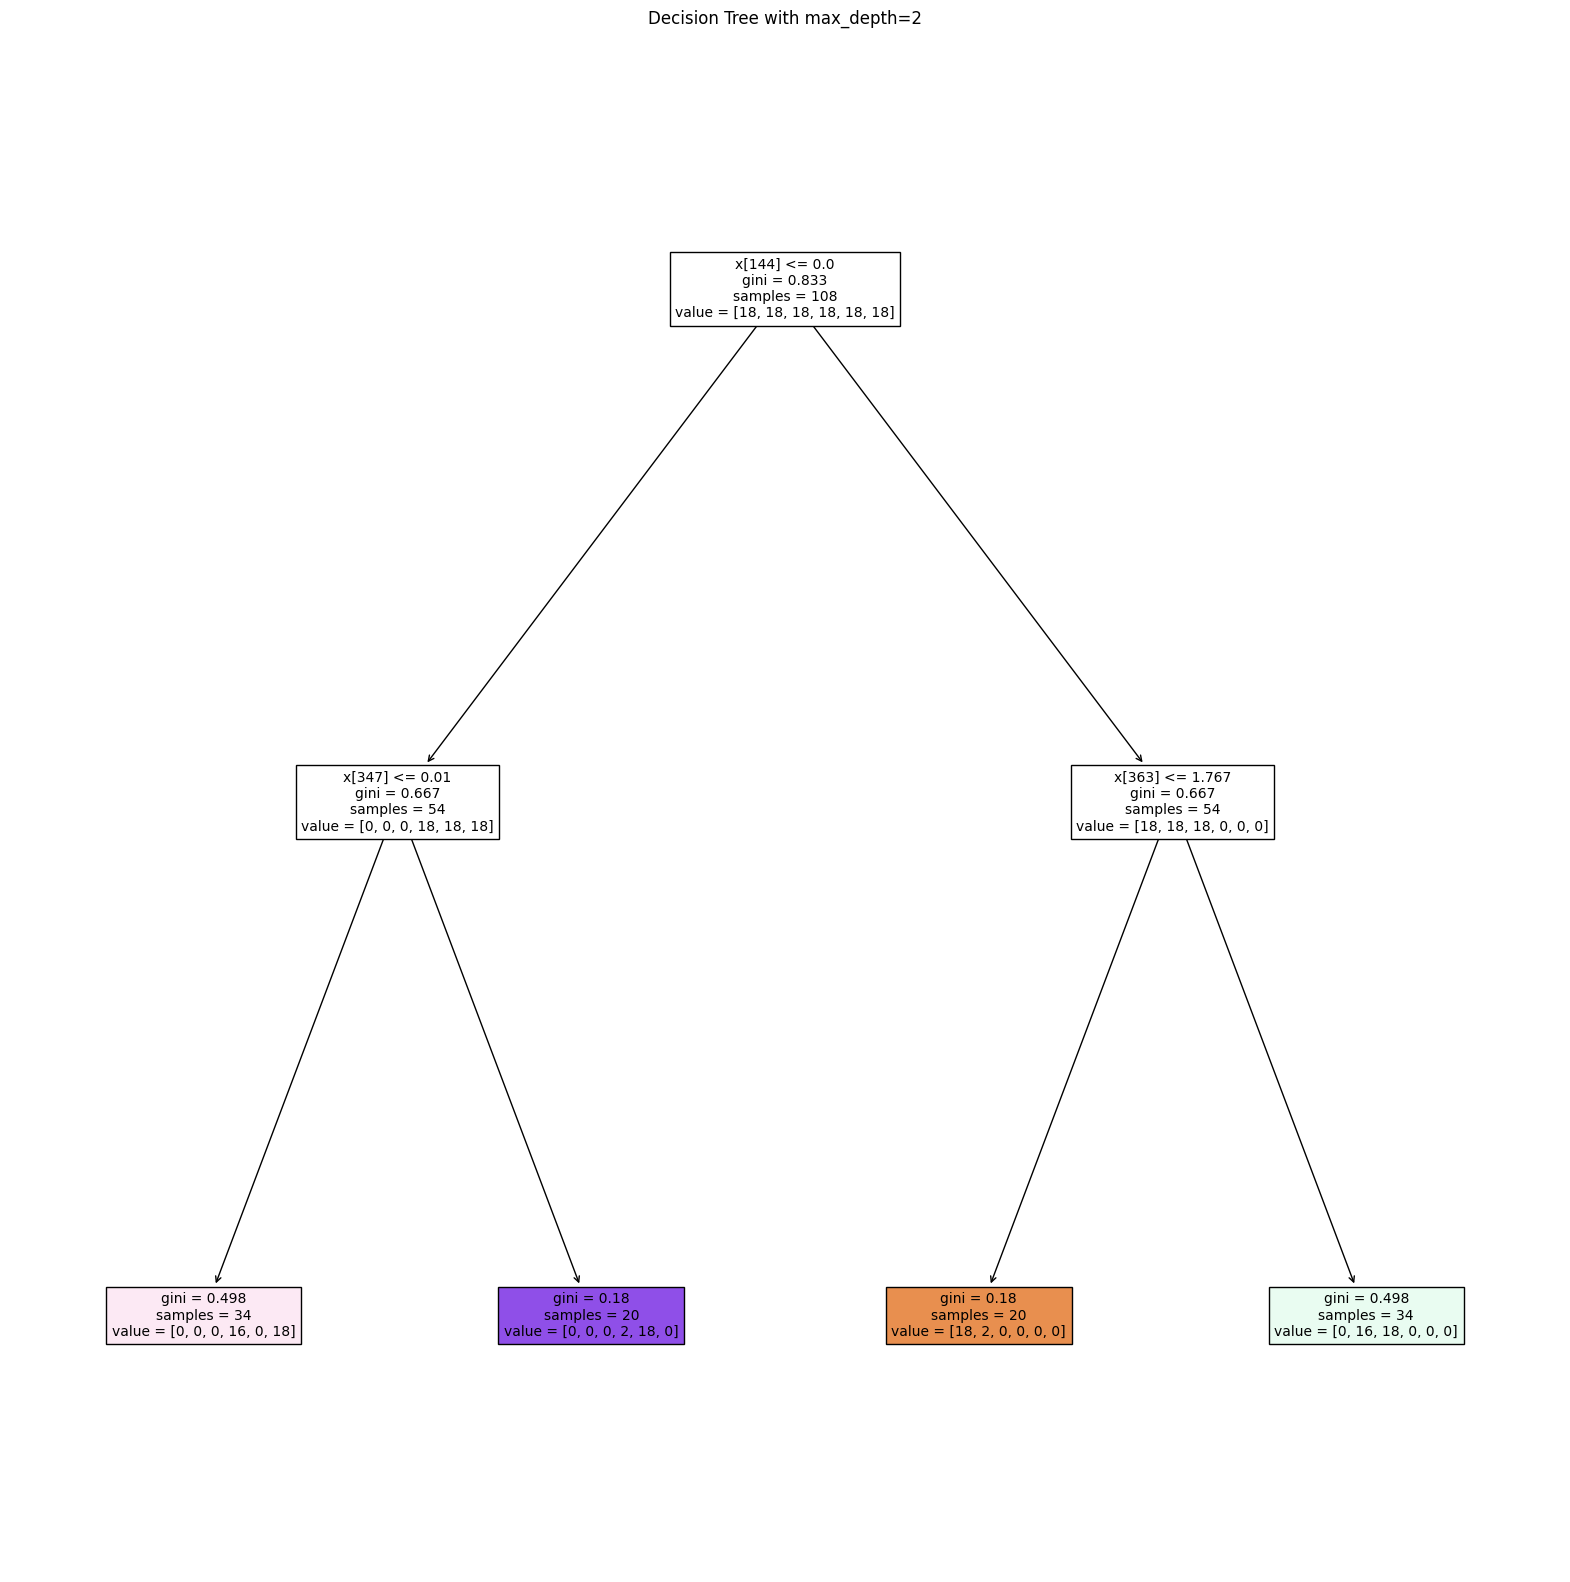

Accuracy Score: 0.6388888888888888
Recall Scores for Decision Tree (max_depth=2):
Recall for class LAY: 1.0000
Recall for class SIT: 0.0000
Recall for class STAND: 1.0000
Recall for class WALK: 0.0000
Recall for class W_D: 0.8333
Recall for class W_U: 1.0000


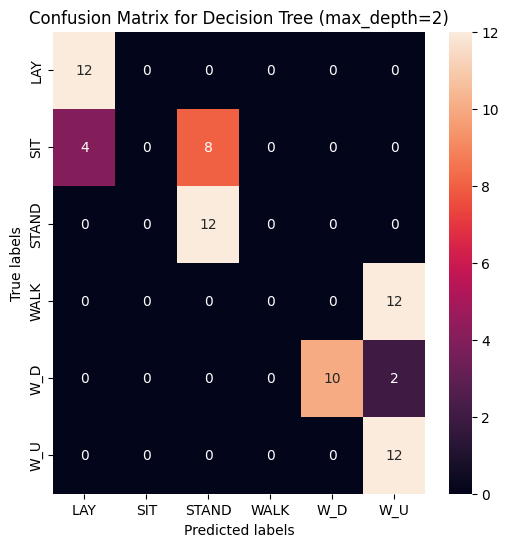

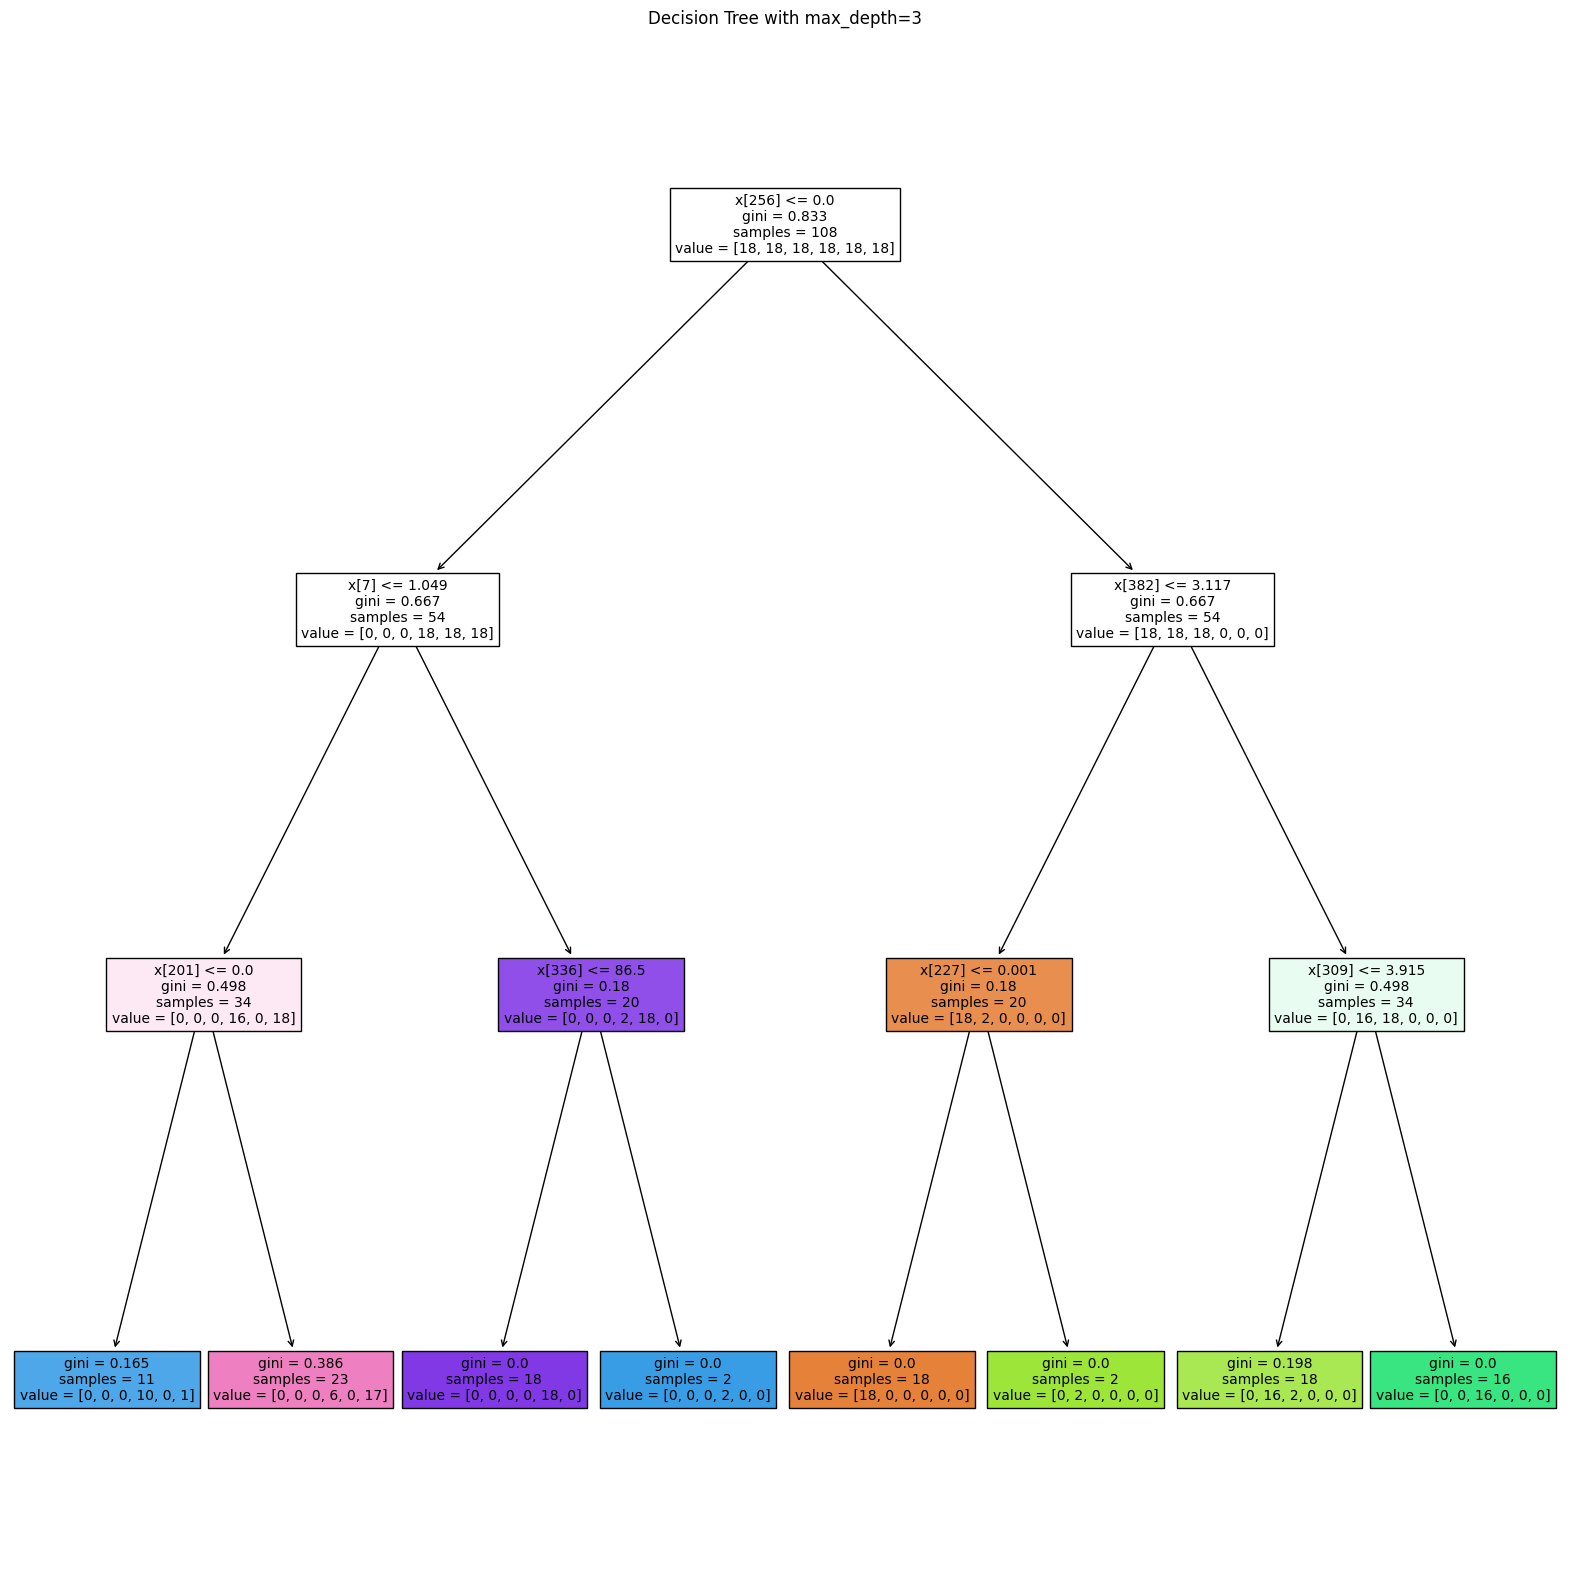

Accuracy Score: 0.7222222222222222
Recall Scores for Decision Tree (max_depth=3):
Recall for class LAY: 0.9167
Recall for class SIT: 0.7500
Recall for class STAND: 0.8333
Recall for class WALK: 0.5833
Recall for class W_D: 0.7500
Recall for class W_U: 0.5000


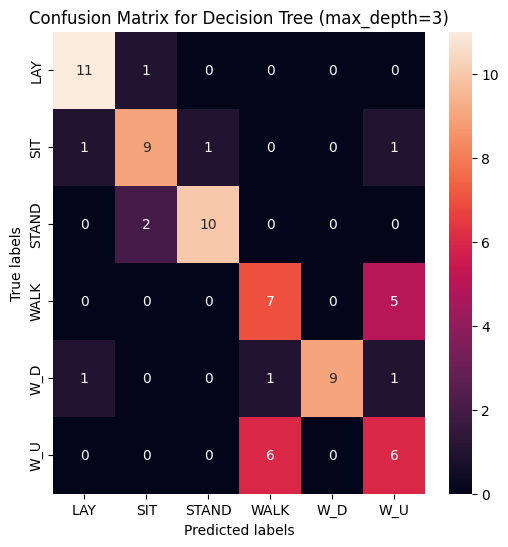

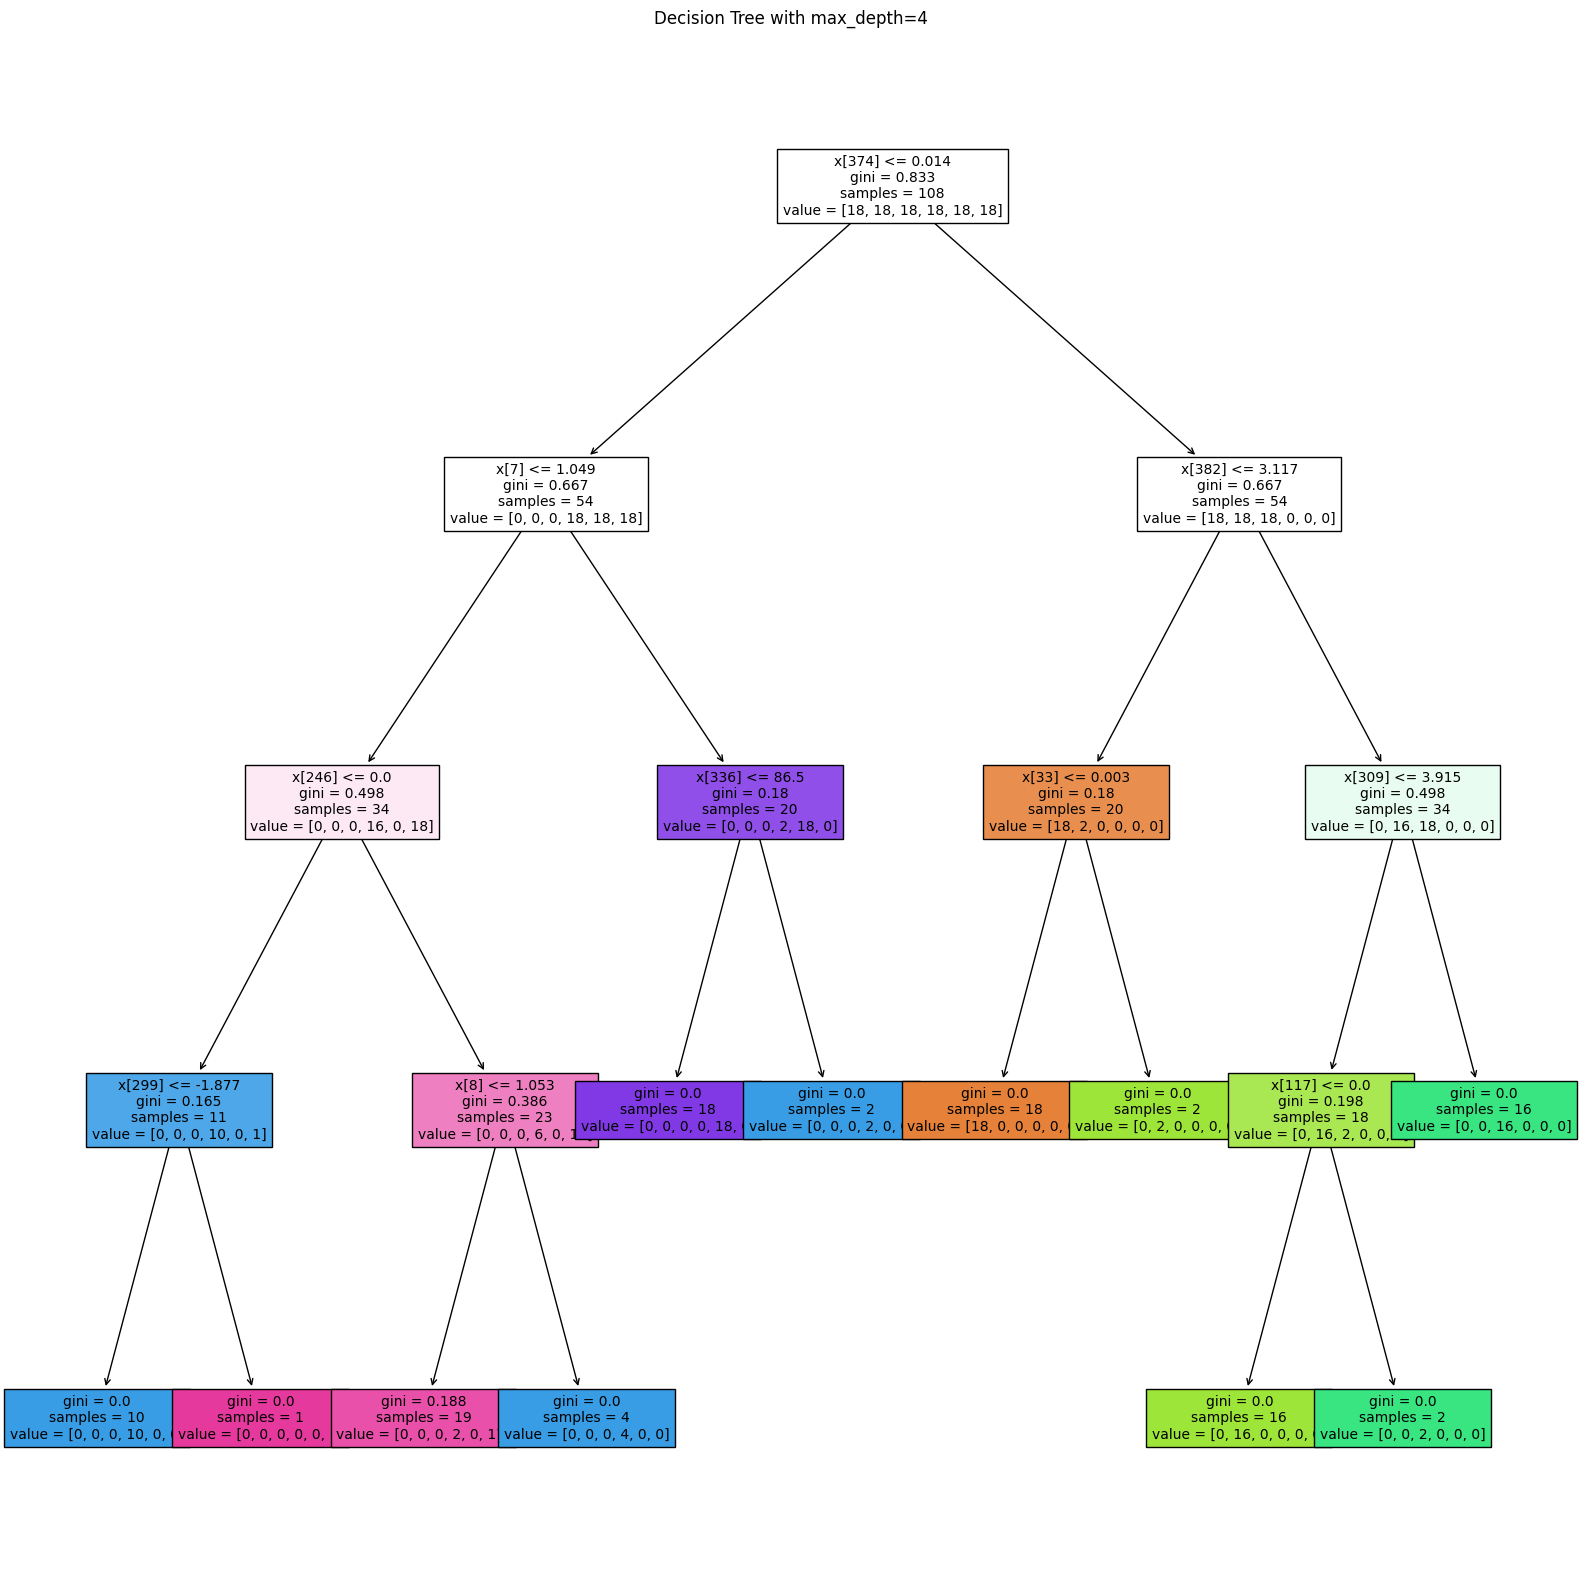

Accuracy Score: 0.6944444444444444
Recall Scores for Decision Tree (max_depth=4):
Recall for class LAY: 1.0000
Recall for class SIT: 0.6667
Recall for class STAND: 0.8333
Recall for class WALK: 0.5833
Recall for class W_D: 0.7500
Recall for class W_U: 0.3333


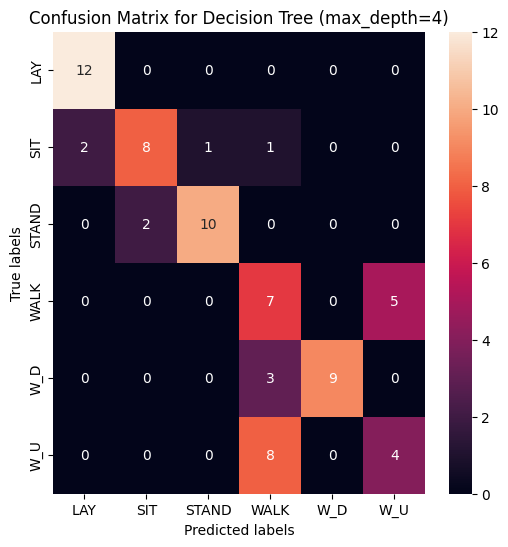

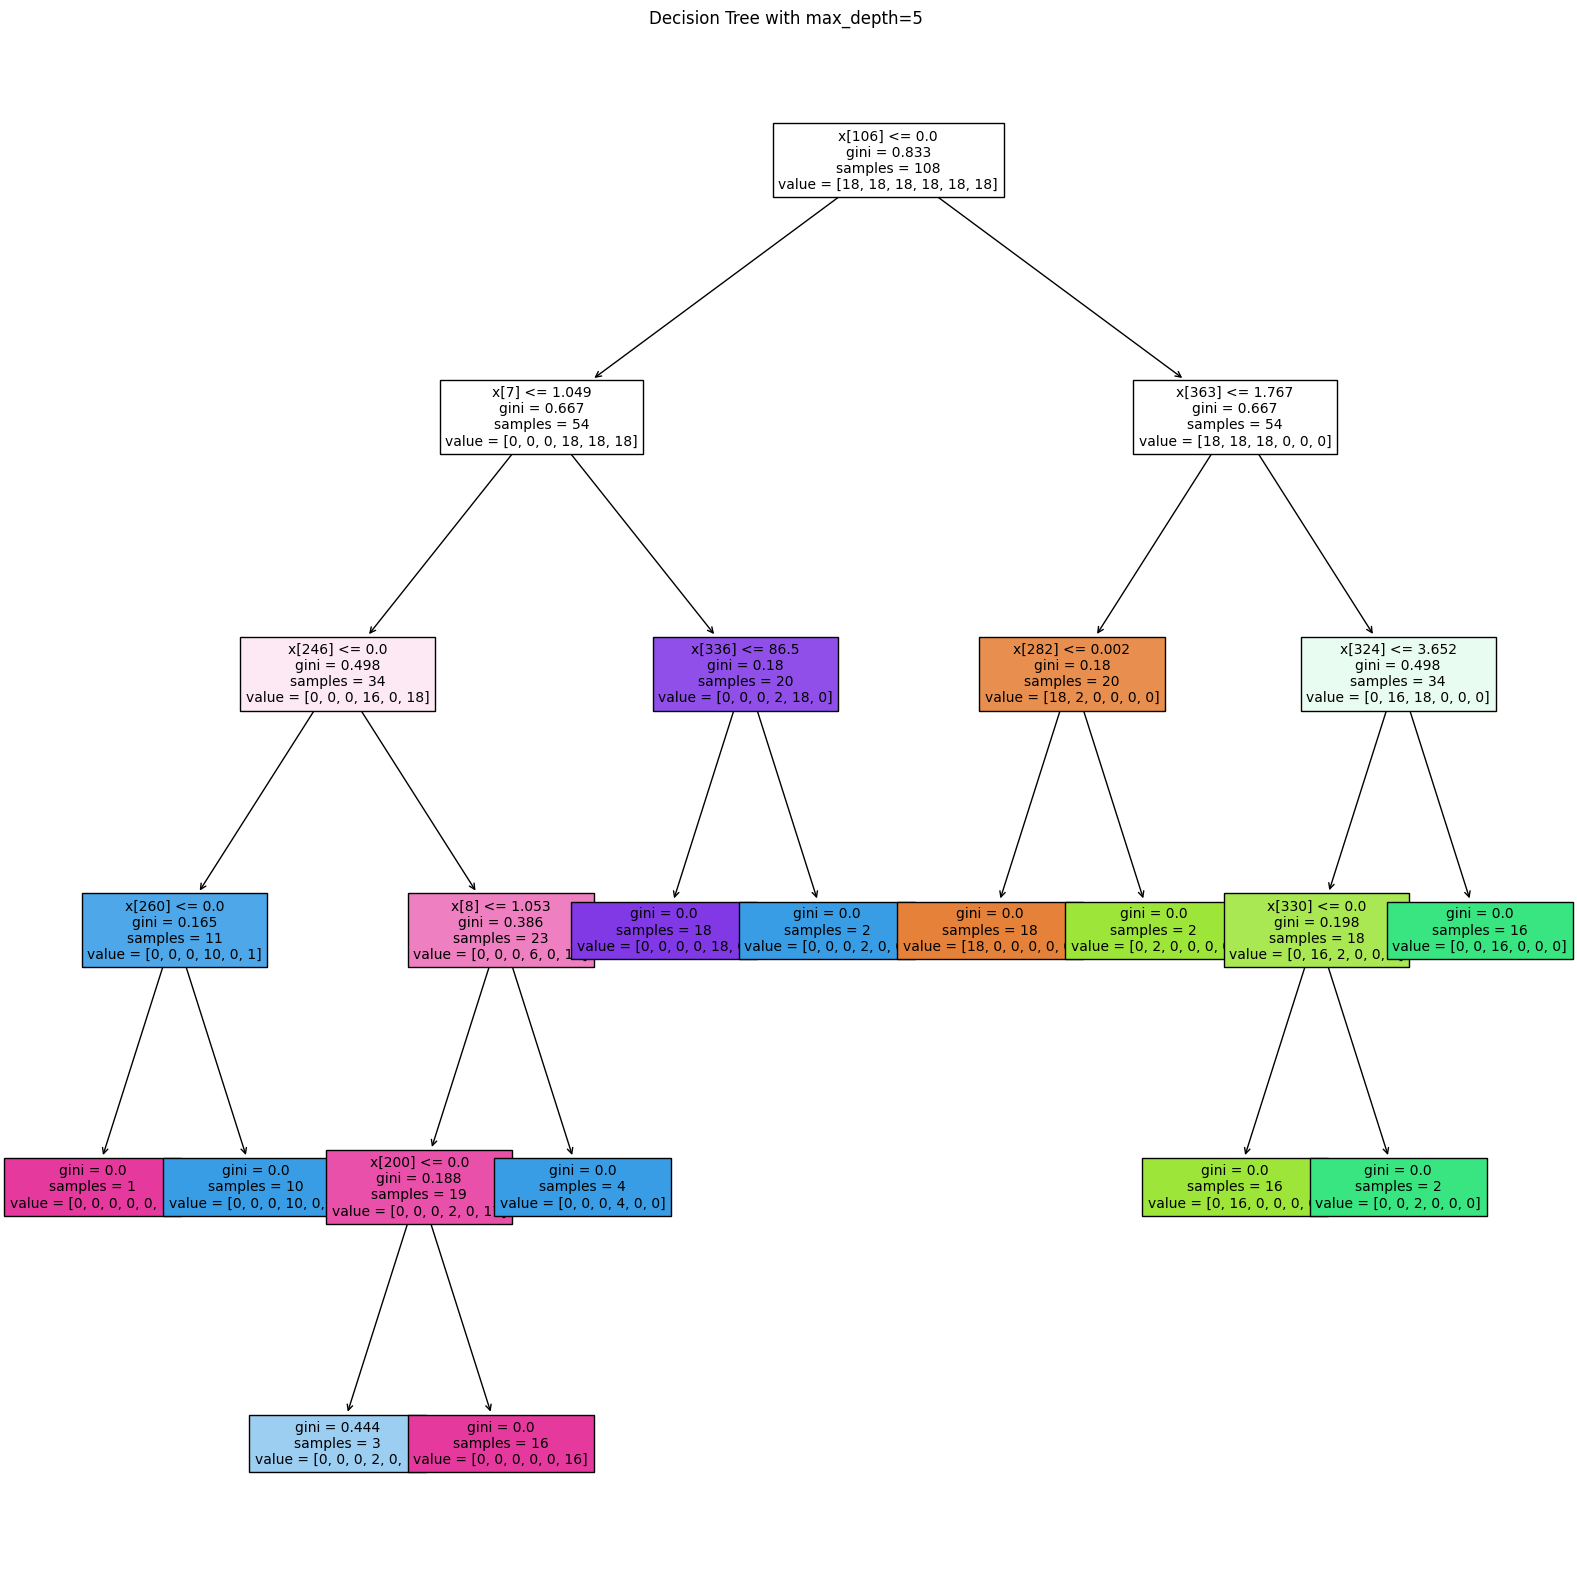

Accuracy Score: 0.6388888888888888
Recall Scores for Decision Tree (max_depth=5):
Recall for class LAY: 0.7500
Recall for class SIT: 0.7500
Recall for class STAND: 0.9167
Recall for class WALK: 0.5000
Recall for class W_D: 0.6667
Recall for class W_U: 0.2500


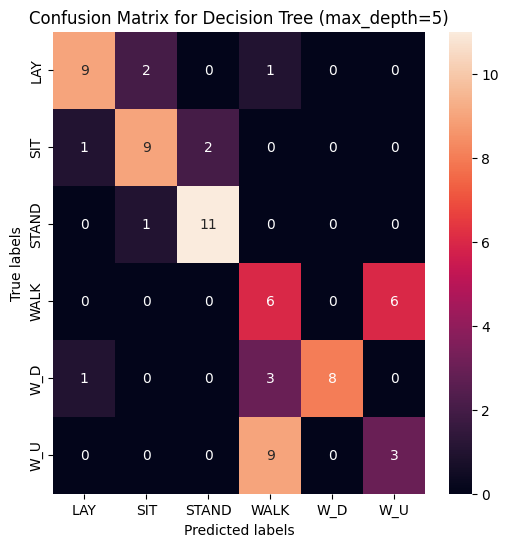

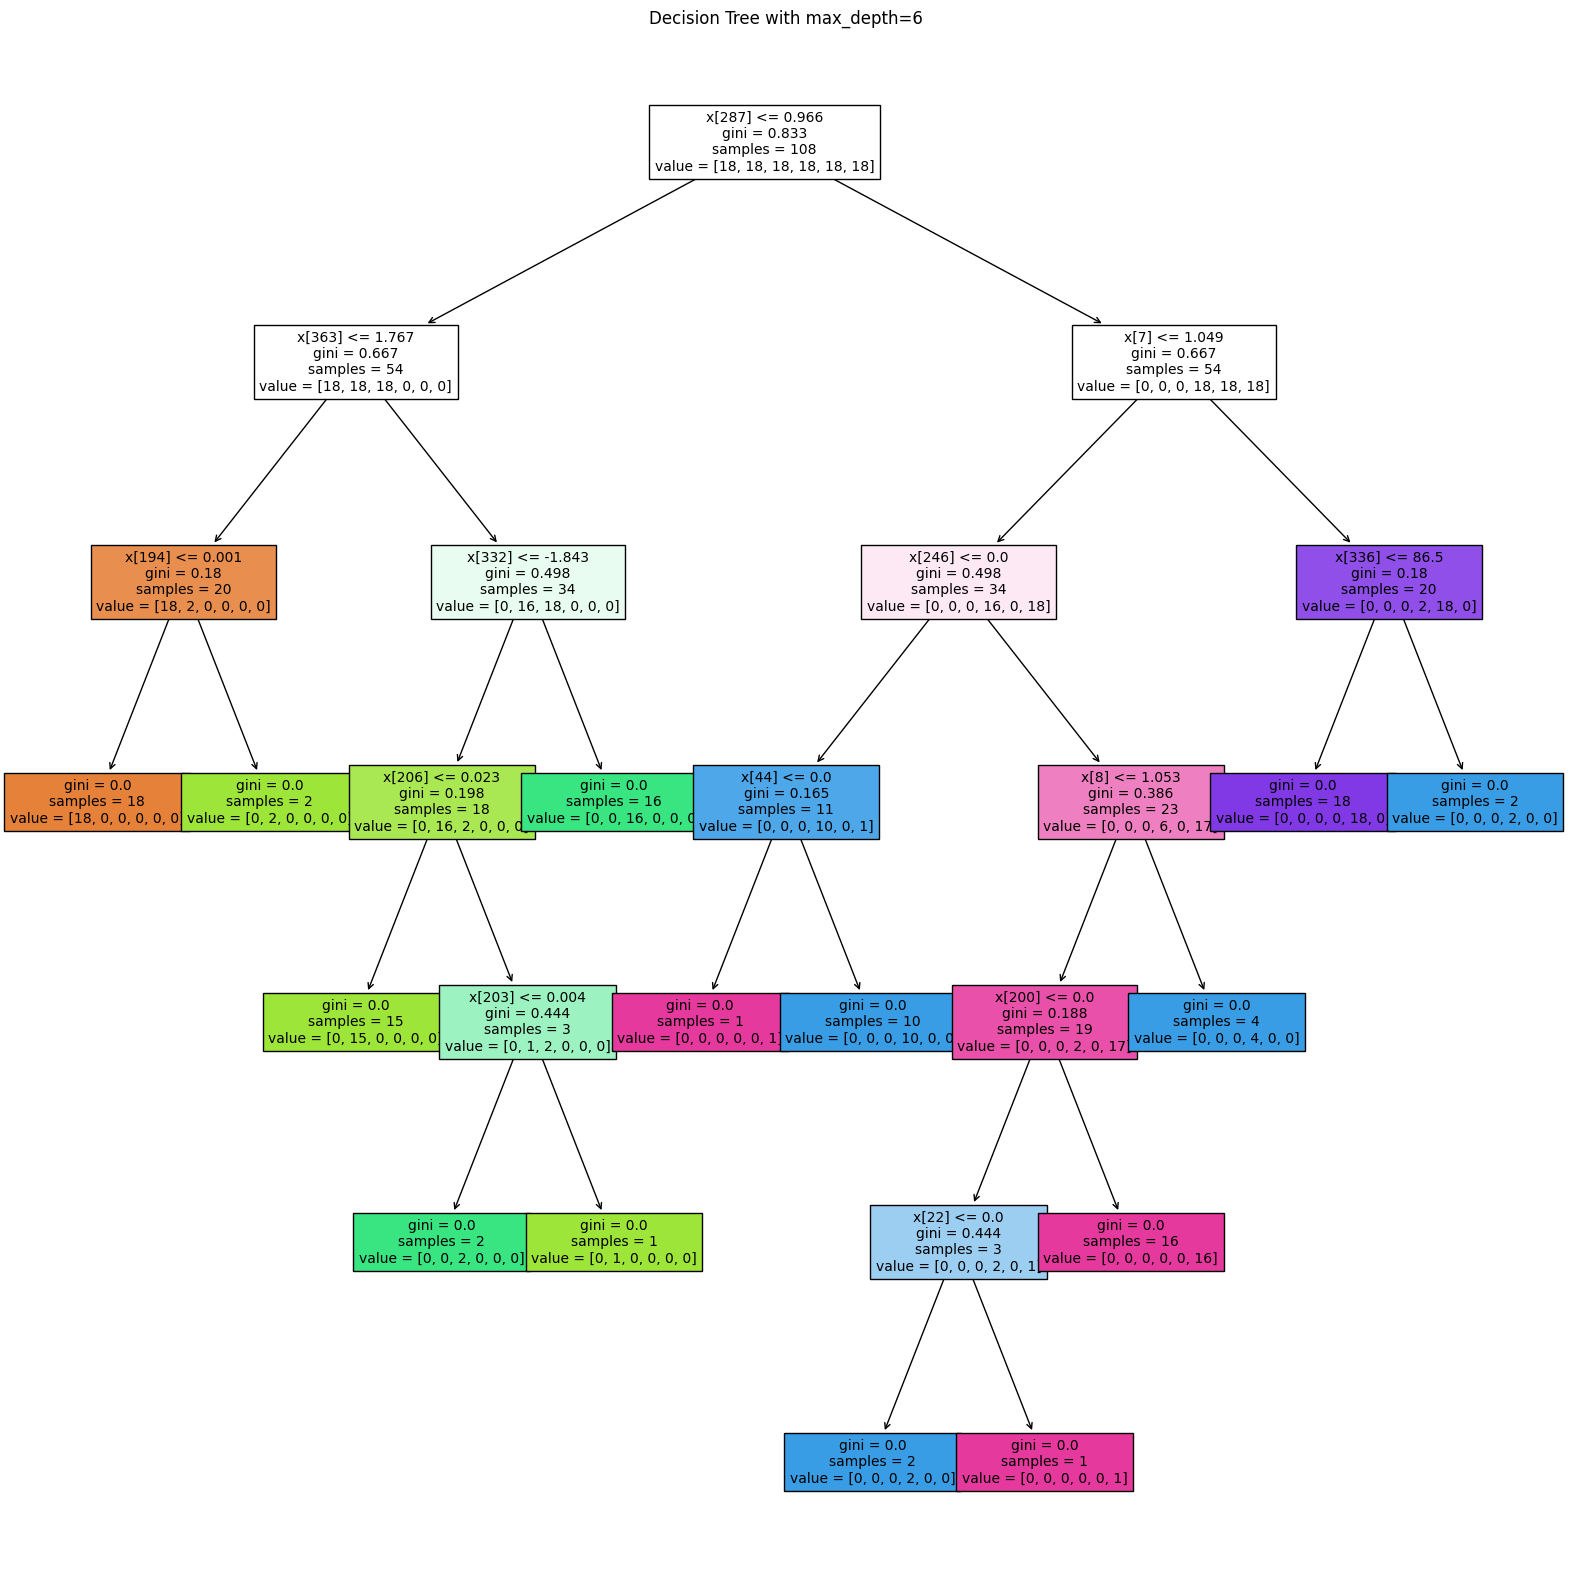

Accuracy Score: 0.7083333333333334
Recall Scores for Decision Tree (max_depth=6):
Recall for class LAY: 0.9167
Recall for class SIT: 0.5833
Recall for class STAND: 0.9167
Recall for class WALK: 0.6667
Recall for class W_D: 0.7500
Recall for class W_U: 0.4167


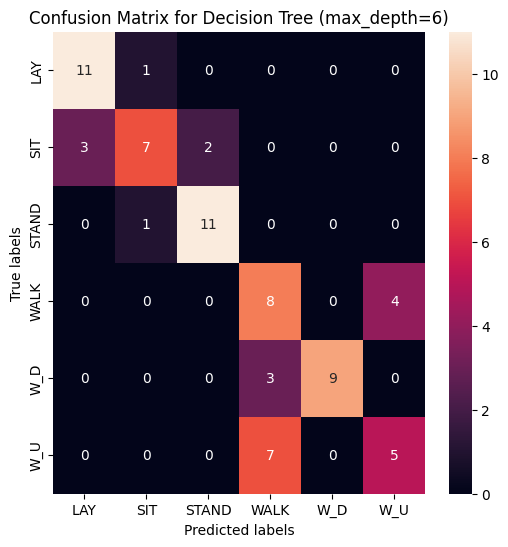

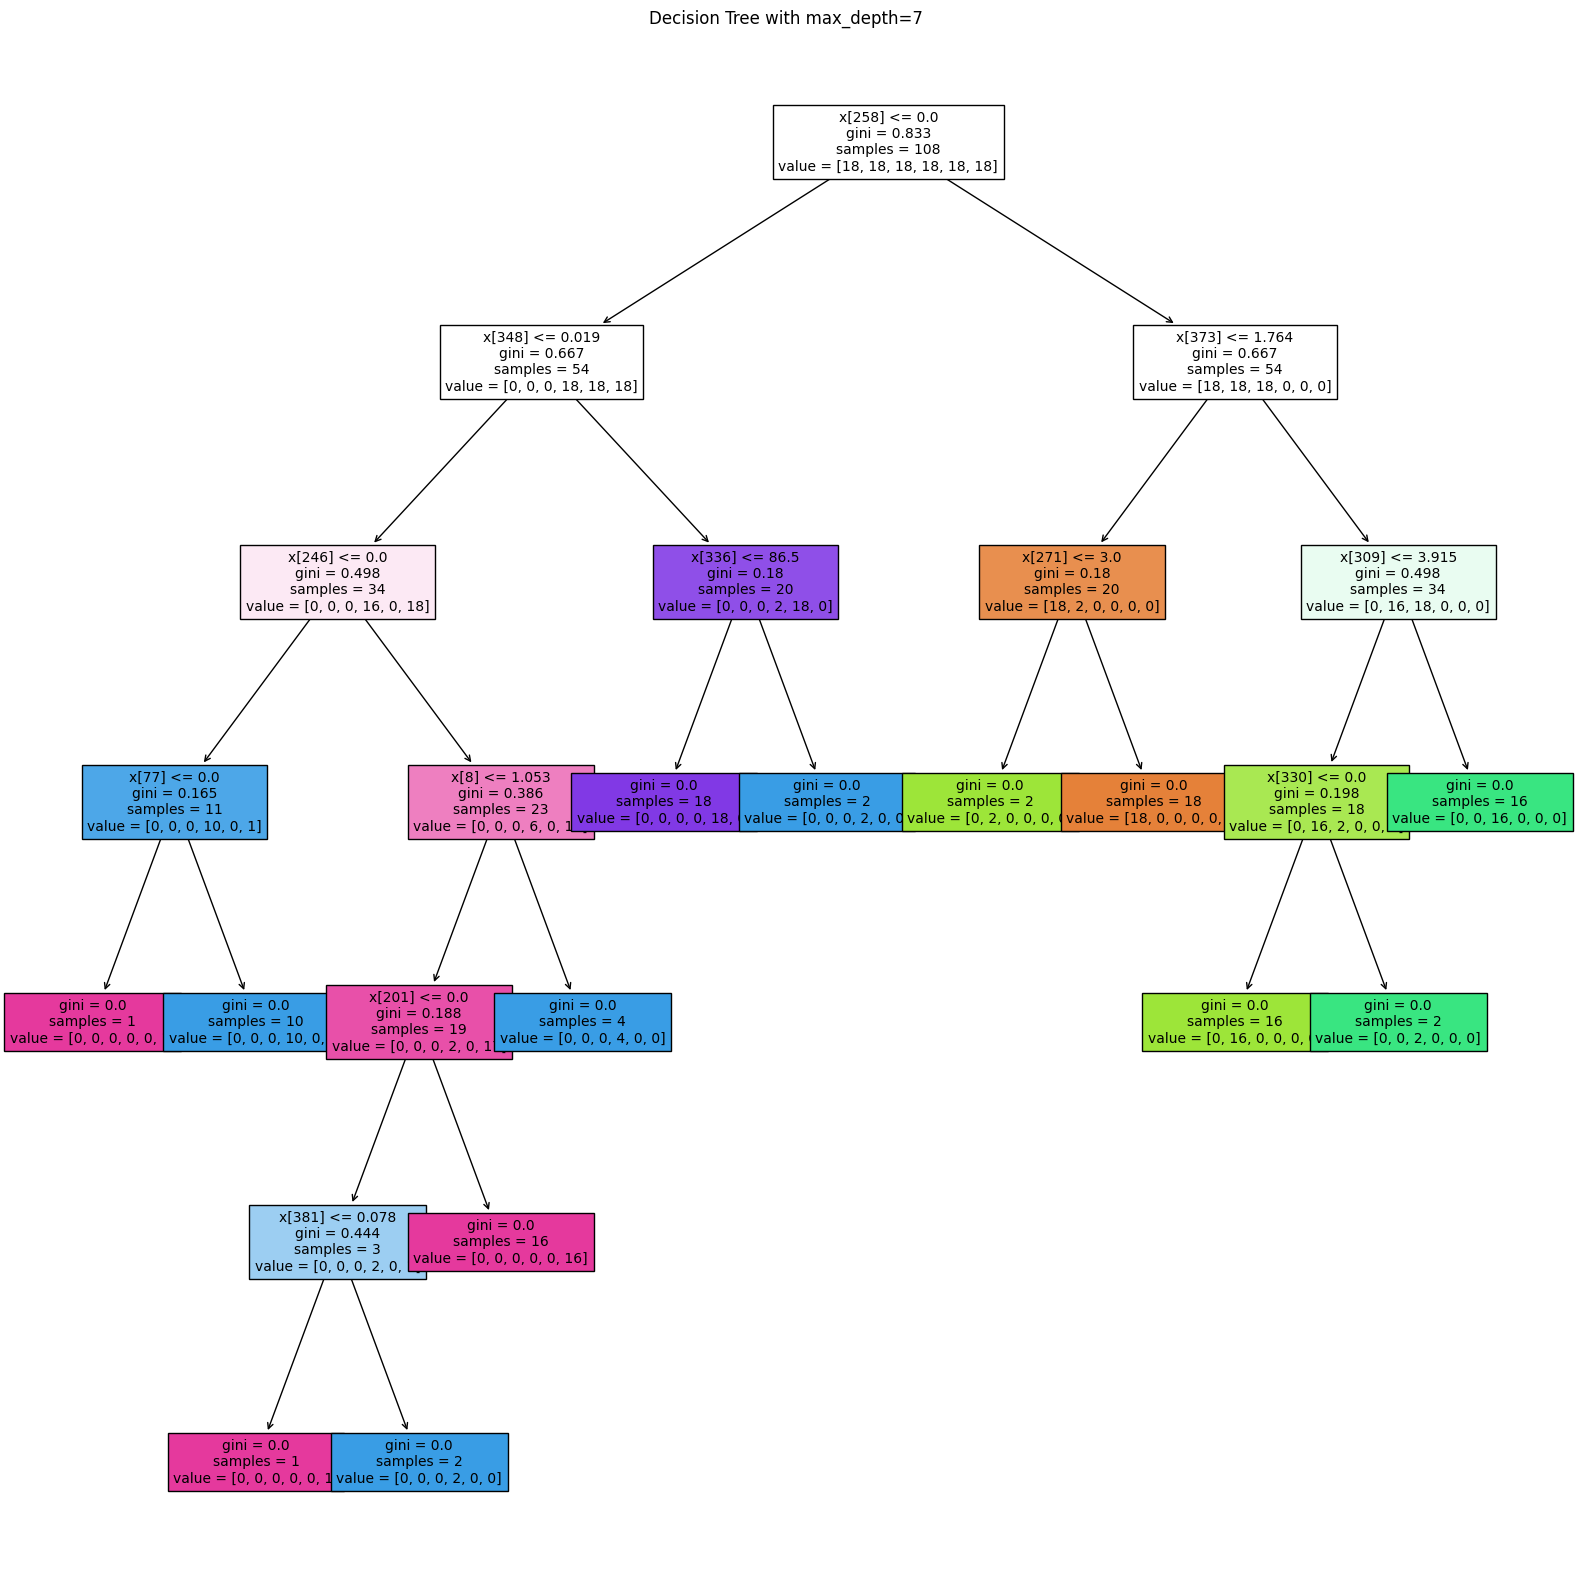

Accuracy Score: 0.7222222222222222
Recall Scores for Decision Tree (max_depth=7):
Recall for class LAY: 0.9167
Recall for class SIT: 0.6667
Recall for class STAND: 0.9167
Recall for class WALK: 0.8333
Recall for class W_D: 0.7500
Recall for class W_U: 0.2500


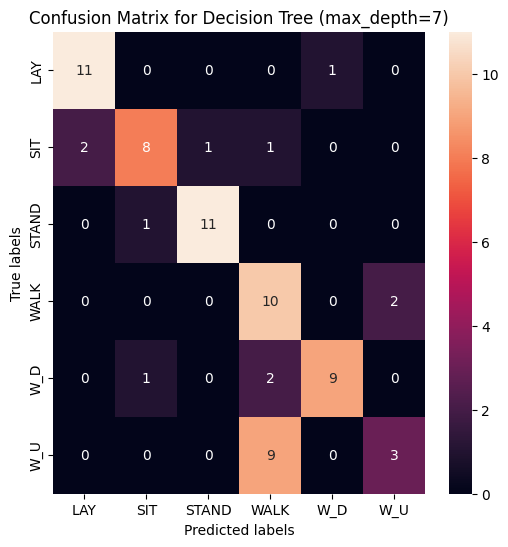

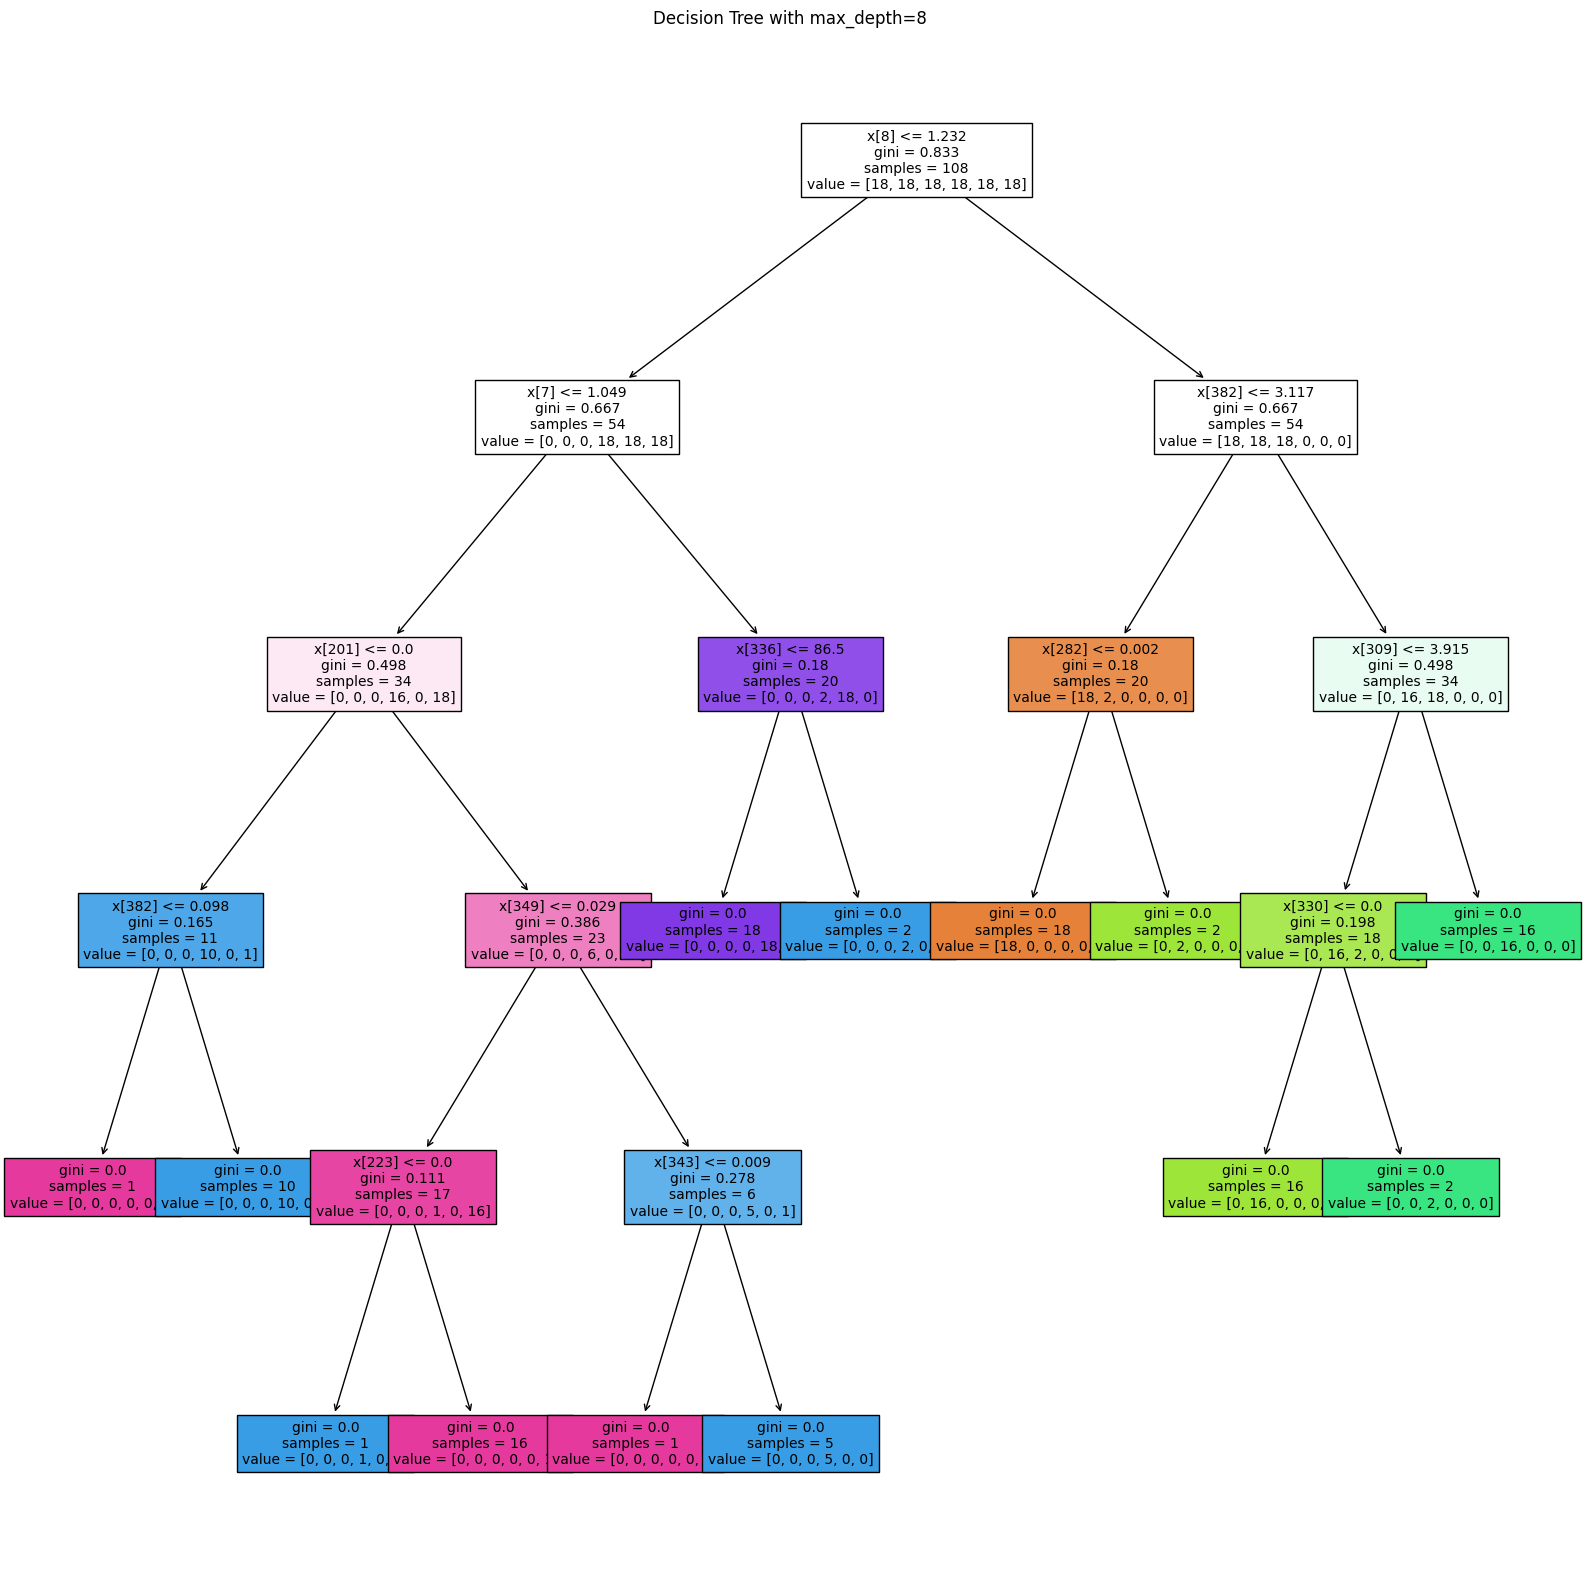

Accuracy Score: 0.7638888888888888
Recall Scores for Decision Tree (max_depth=8):
Recall for class LAY: 0.8333
Recall for class SIT: 0.8333
Recall for class STAND: 0.9167
Recall for class WALK: 0.6667
Recall for class W_D: 0.7500
Recall for class W_U: 0.5833


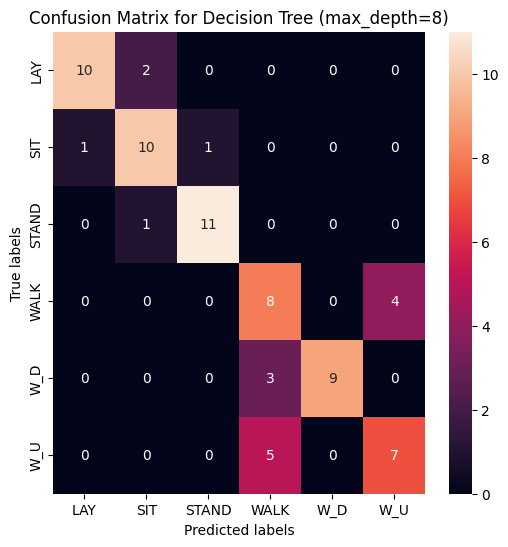

In [21]:
label_names = ["LAY", "SIT", "STAND", "WALK", "W_D", "W_U"]
accuracy_values_tsfel = []
recall_scores = []
for i in range(2, 9):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train_tsfel, y_train_tsfel)

    # Plot individual decision tree
    plt.figure(figsize=(20, 20))
    plot_tree(dt, filled=True, fontsize=10)
    plt.title(f'Decision Tree with max_depth={i}')
    plt.show()

    # Evaluate the model
    yPred = dt.predict(X_test_tsfel)
    acc=accuracy_score(y_test_tsfel, yPred)
    print("Accuracy Score:", acc)
    accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred))
    label_names1 = [1, 2, 3, 4, 5, 6]

    recall_per_class = recall_score(y_test_tsfel,yPred, labels=label_names1, average=None)

    # Print recall for each class
    print(f'Recall Scores for Decision Tree (max_depth={i}):')
    for j, recall in enumerate(recall_per_class):
        print(f'Recall for class {label_names[j]}: {recall:.4f}')

    recall_scores.append(recall_score(y_test_tsfel, yPred, average='weighted'))


    # Plot confusion matrix
    cm = confusion_matrix(y_test_tsfel, yPred, labels=[1, 2, 3, 4, 5, 6])
    plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for Decision Tree (max_depth={i})')

    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    ax.xaxis.set_ticklabels(label_names)
    ax.yaxis.set_ticklabels(label_names)
    plt.show()   


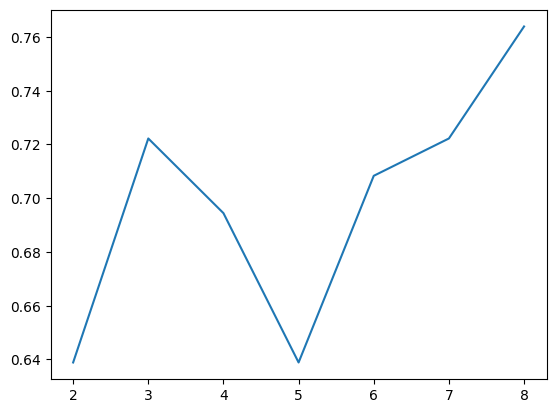

In [22]:
plt.plot(range(2,9), accuracy_values_tsfel)


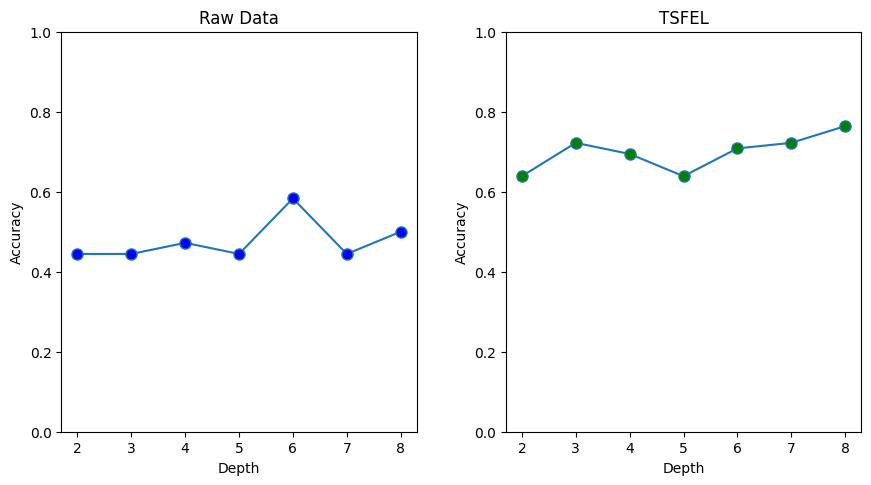

In [23]:
figure, axis = plt.subplots(1, 2, figsize = (8,4))

axis[0].plot(range(2,9), accuracy_values, marker='o', markerfacecolor='blue', markersize=8)
axis[0].set_title("Raw Data")
axis[0].set_xlabel("Depth")
axis[0].set_ylabel("Accuracy")
axis[0].set_ylim(0, 1)
axis[1].set_ylim(0, 1)
axis[1].plot(range(2,9), accuracy_values_tsfel, marker='o', markerfacecolor='green', markersize=8)
axis[1].set_title("TSFEL")
axis[1].set_xlabel("Depth")
axis[1].set_ylabel("Accuracy")

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0.25, 
                    hspace=0.25)

## Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

##### If we check the confusion matrix for the model trained on the featured data, we can see that the model is not able to classify the activities of laying and sitting. This is because the data for these two activities is very similar and the model is not able to differentiate between them. This is also evident in the scatter plot of the featured data, where the data points for these two activities are very close together and it is difficult to differentiate between them. and recall for these two activities is very low. 

## Deployment

##### We  collect the data data of four persons of 6 activities. We use the data of one person as test data. check            
 "Mini-Project/Deployment/Test"

In [24]:
from sklearn.tree import plot_tree
from MakeDataset_deployment import *
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

(180, 500, 3)
(180,)
(30, 500, 3)
(30,)
Training data shape:  (180, 500, 3)
Testing data shape:  (30, 500, 3)


In [25]:
xtrain = X_train_dep.reshape(180,1500)
ytrain = y_train_dep

print("xTrain Size:", xtrain.shape, "and yTrain Size:", ytrain.shape)

xTrain Size: (180, 1500) and yTrain Size: (180,)


##### Train decision tree model with train data

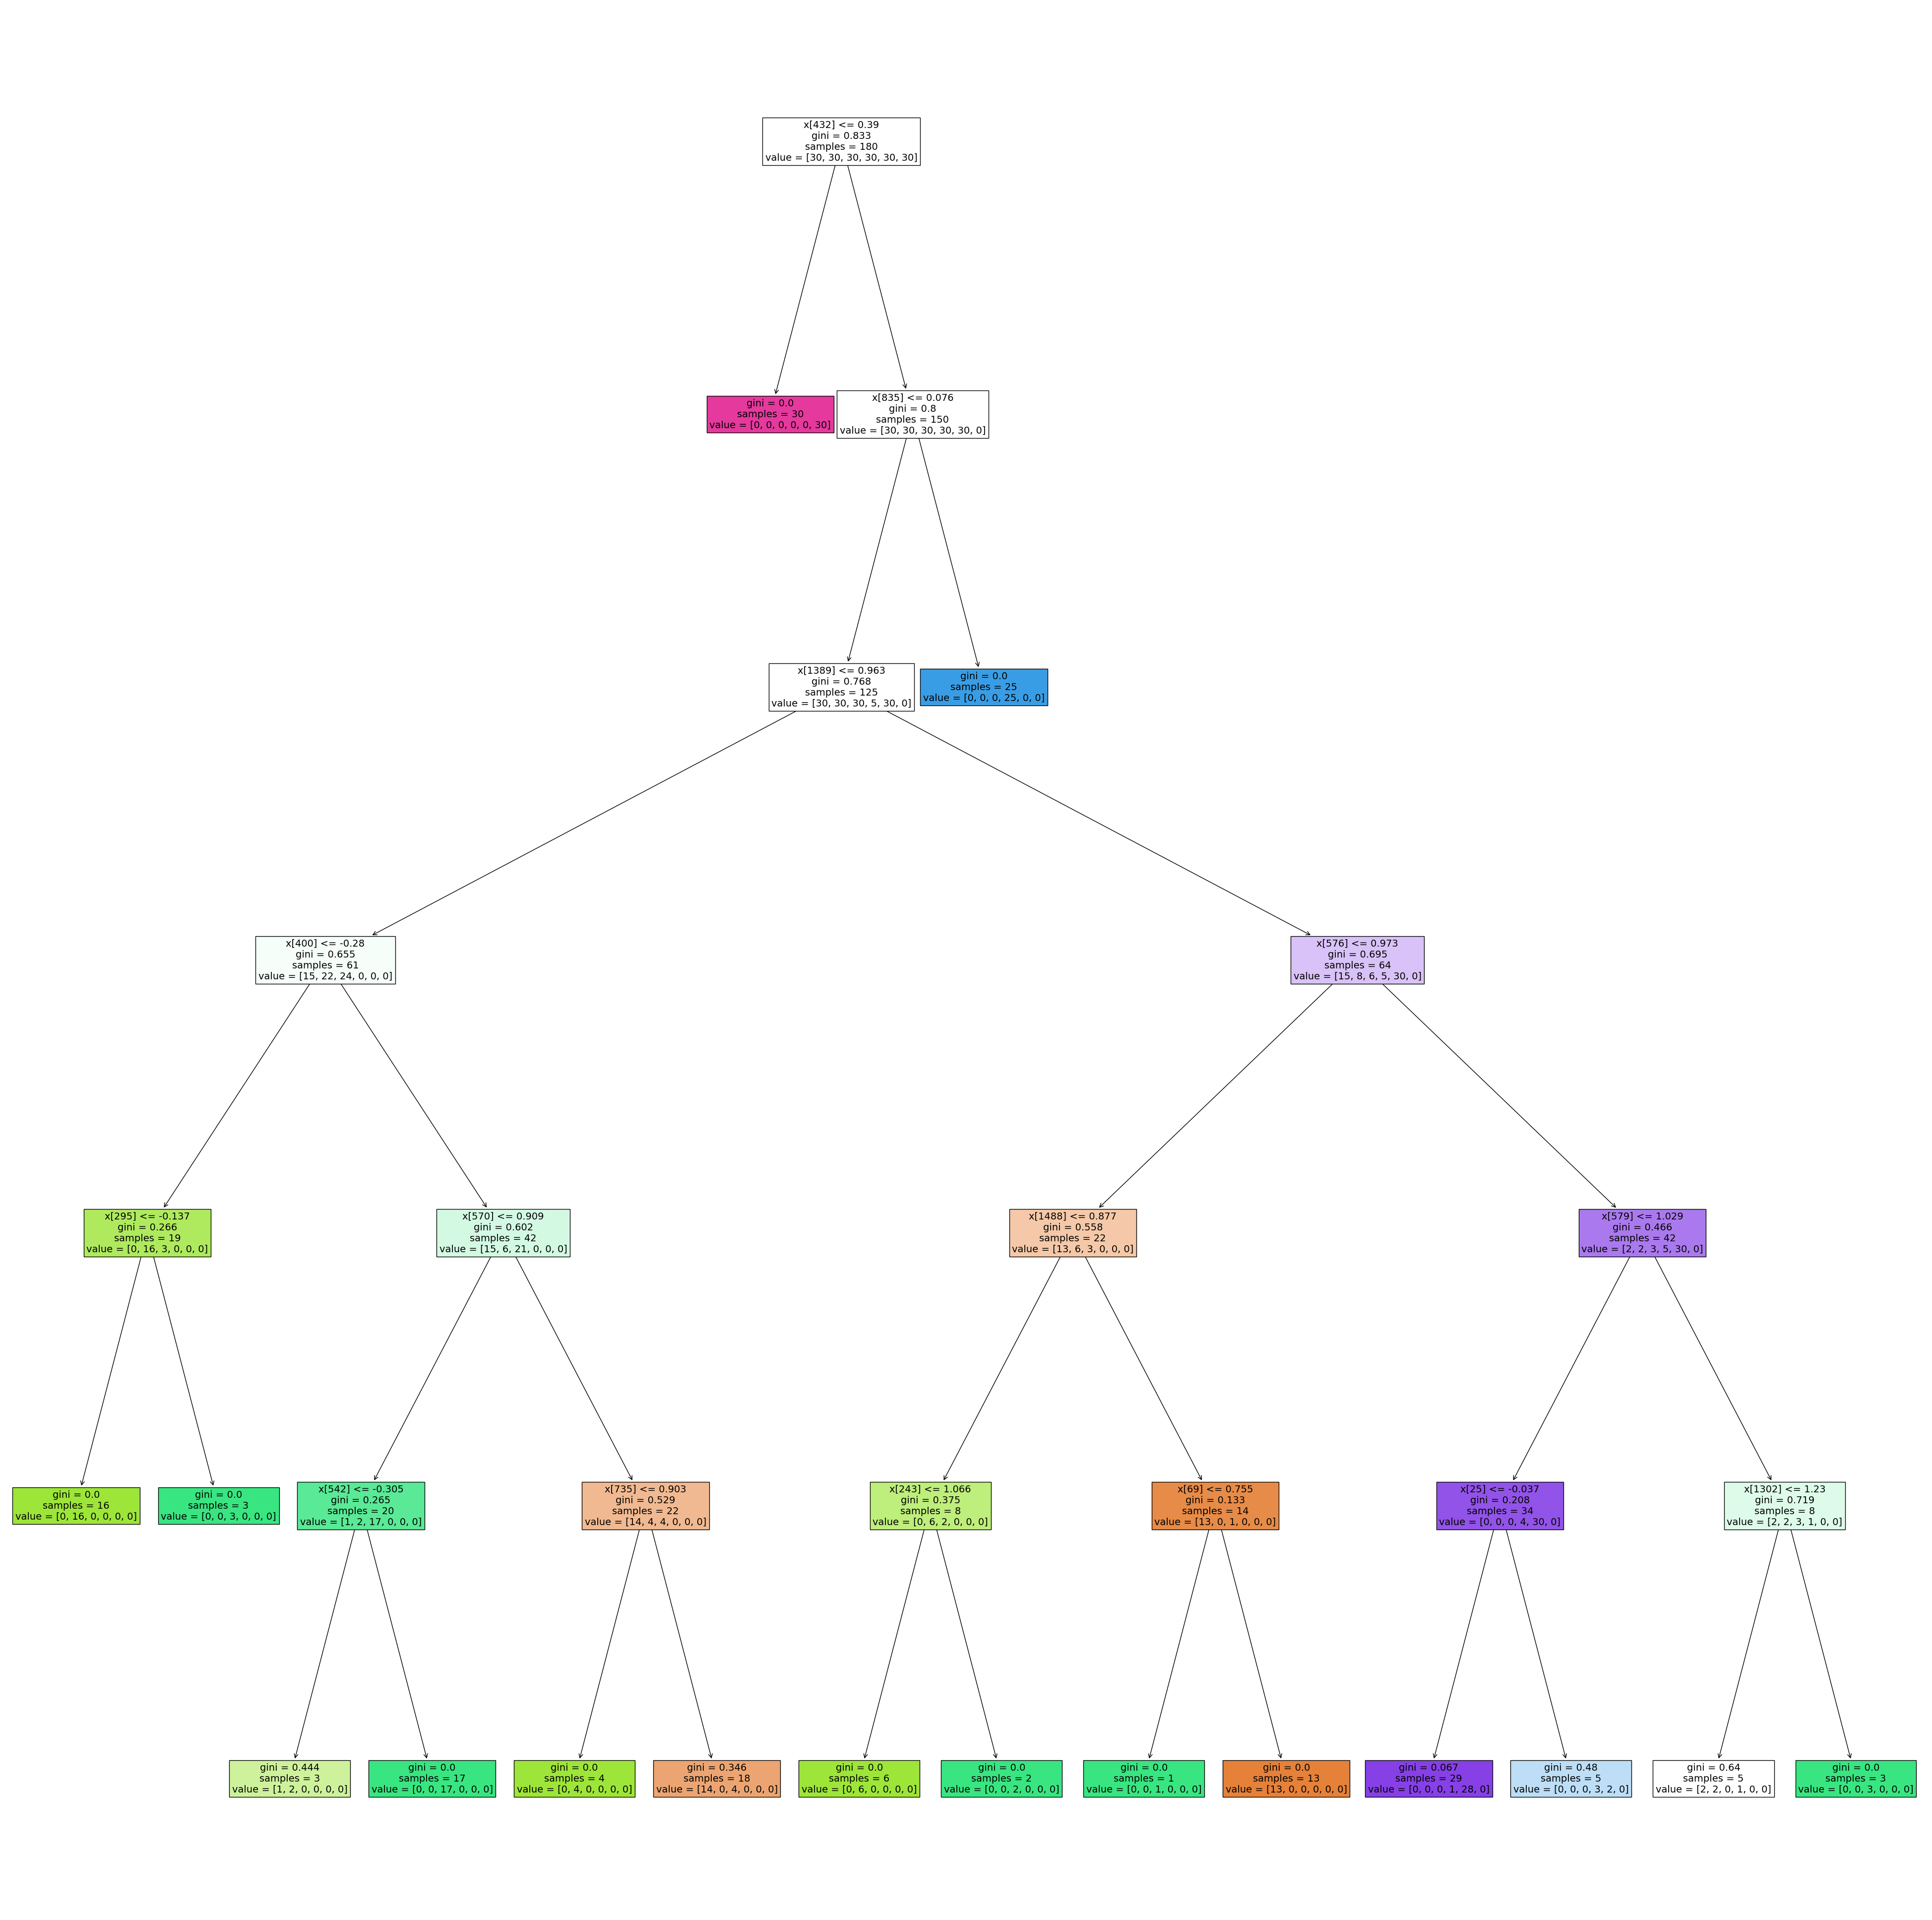

In [26]:
dt_raw_dep = DecisionTreeClassifier(max_depth=6)
dt_raw_dep.fit(xtrain, ytrain)

plt.figure(figsize=(50,50))
plot_tree(dt_raw_dep, filled=True, fontsize=14)
plt.show()

##### Test on test collected data

Accuracy Score: 0.23333333333333334


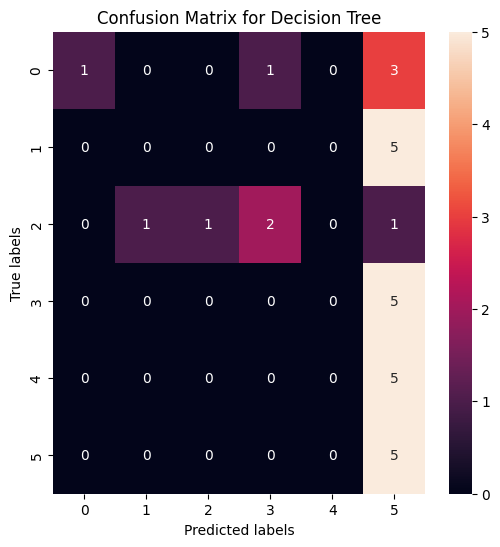

In [27]:
yPred_dep = dt_raw_dep.predict(x_test_dep.reshape(30,1500))
print("Accuracy Score:", accuracy_score(y_test_dep, yPred_dep))
# print("Confusion Matrix:\n", confusion_matrix(y_test_dep, yPred_dep, labels=[1,2,3,4,5,6]))
cm = confusion_matrix(y_test_dep, yPred_dep, labels=[1, 2, 3, 4, 5, 6])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
ax = plt.subplot()  # Make sure 'ax' is defined here
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree')
plt.show()

#### Train decision tree model with train data with TSFEL features

(1, 384)
(30, 384)
(30,)
[6 6 6 6 6 4 4 4 4 4 5 5 5 5 5 1 1 1 1 1 3 3 3 3 3 2 2 2 2 2]
Training data shape:  (126, 384)
Testing data shape:  (84, 384)
Training data shape:  (126,)
Testing data shape:  (84,)


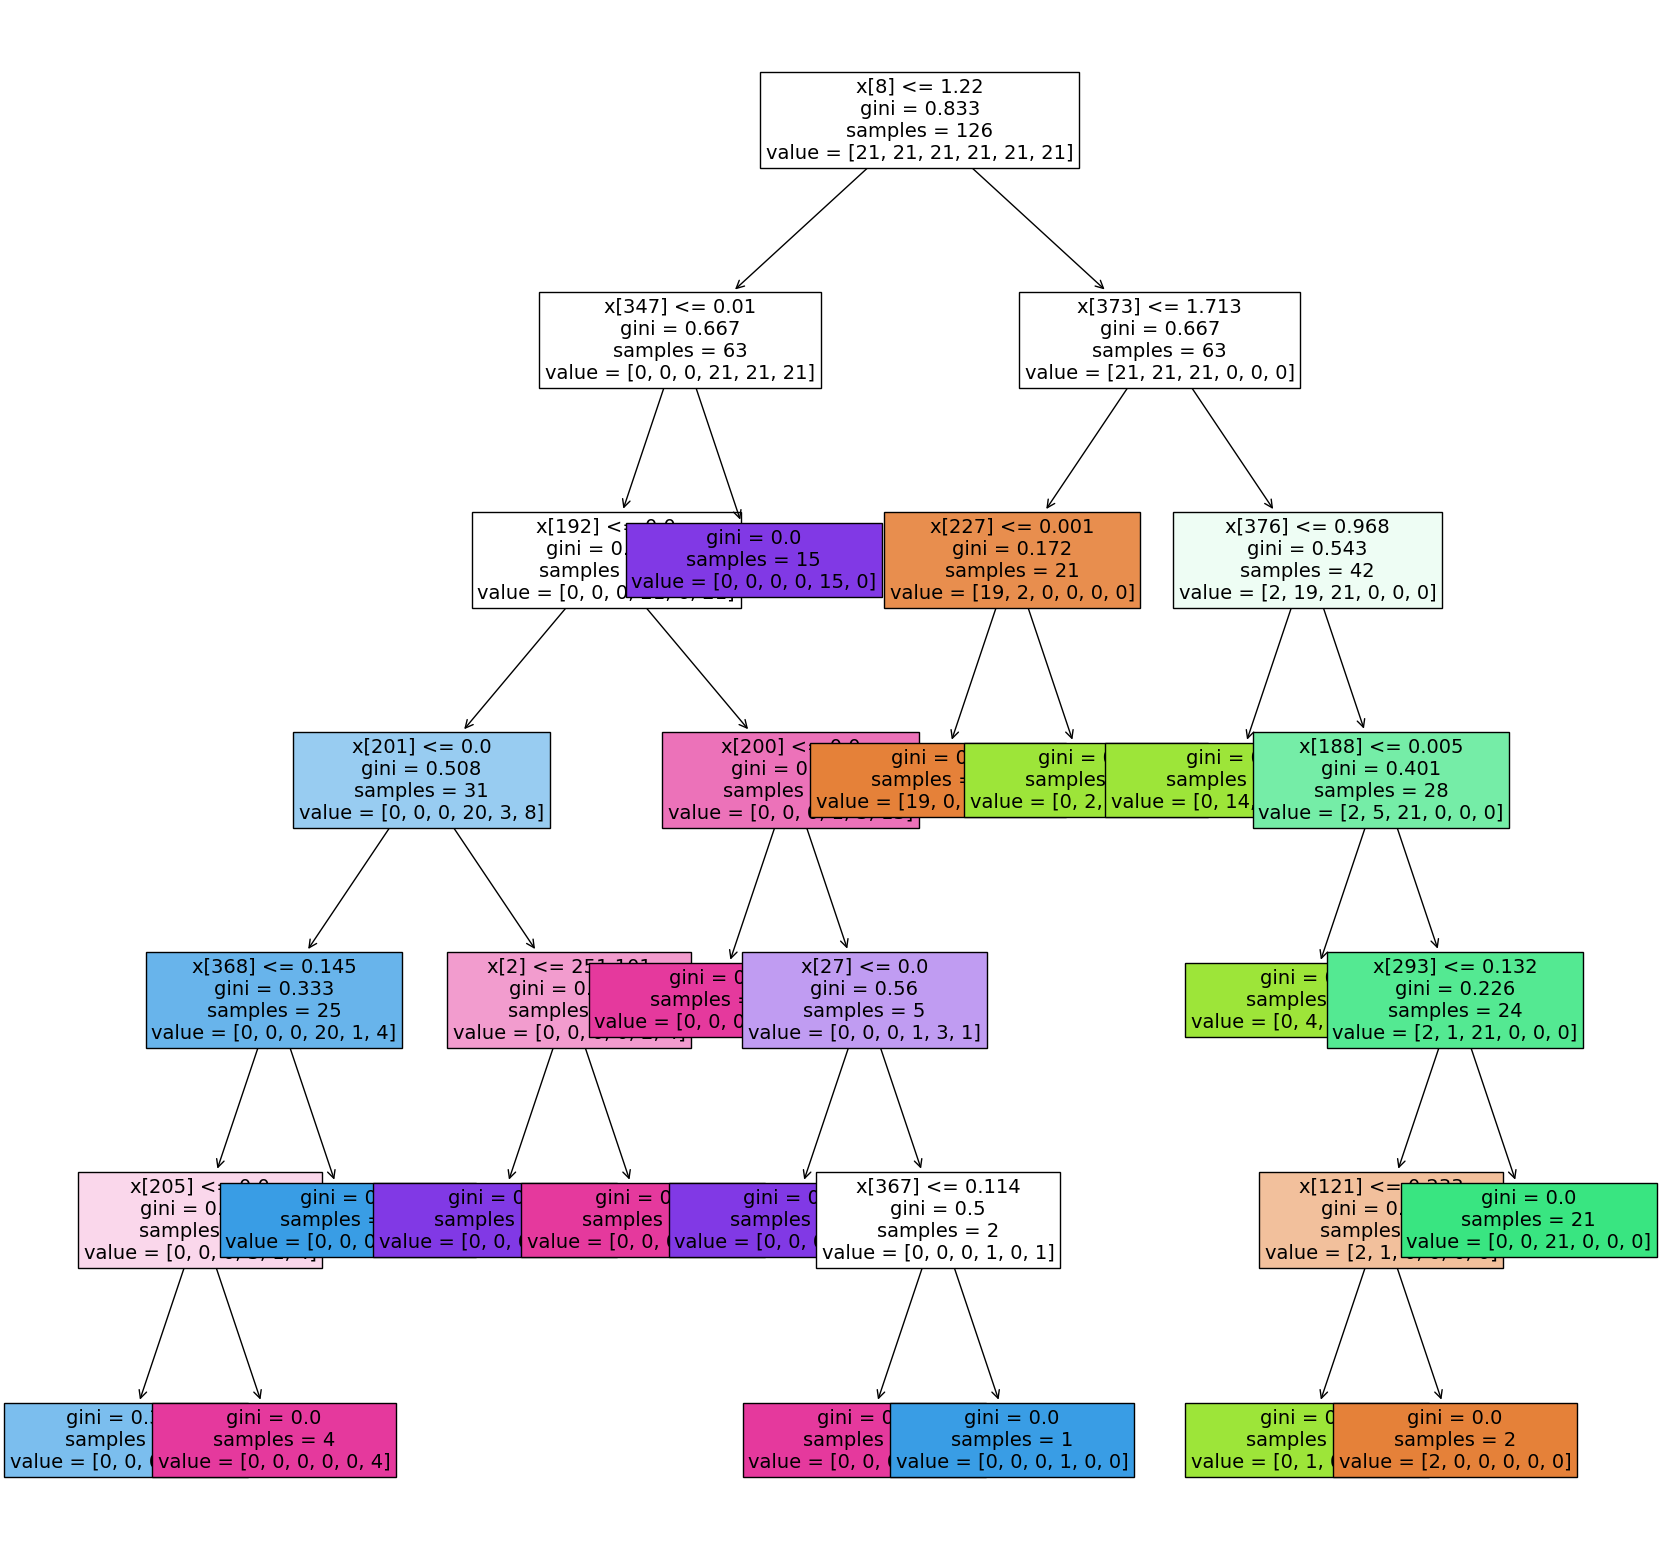

In [28]:
from MakeDataset_deployment_tsfel import *
dt_tsfel_dep = DecisionTreeClassifier(max_depth=6)
dt_tsfel_dep.fit(X_train_tsfel, y_train_tsfel)

plt.figure(figsize=(20,20))
plot_tree(dt_tsfel_dep, filled=True, fontsize=14)
plt.show()

#### predict on test data with TSFEL features

Accuracy Score: 0.6904761904761905


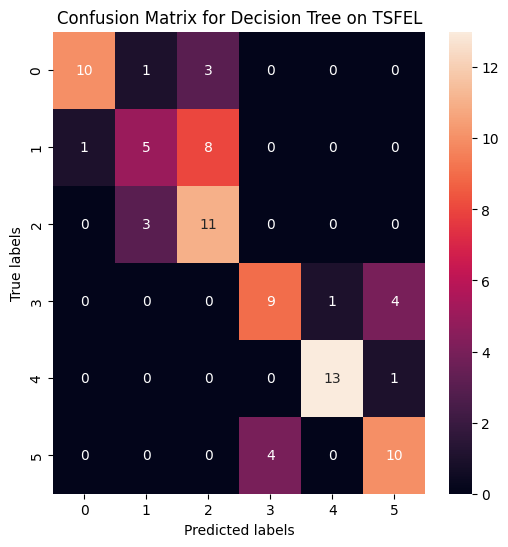

In [29]:
yPred_tsfel = dt_tsfel_dep.predict(X_test_tsfel)
print("Accuracy Score:", accuracy_score(y_test_tsfel, yPred_tsfel))
accuracy_values_tsfel.append(accuracy_score(y_test_tsfel, yPred_tsfel))
cm = confusion_matrix(y_test_tsfel, yPred_tsfel, labels=[1, 2, 3, 4, 5, 6])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
ax = plt.subplot()  # Make sure 'ax' is defined here
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree on TSFEL')
plt.show()